<a href="https://colab.research.google.com/github/Reenu409/Retail-Sales-predictions-Machine-learning-project/blob/main/Final_Retail_Sales_Prediction_Project_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales predictions Machine learning project



##### **Project Type**    - Regression
##### **Contribution**    - Only one
##### **Name**  - Reenu kumari

**Video Link**---

# **Project Summary -**

Data from Rossman Stores has been provided to us, and it contains several variables that have an impact on the stores' sales. We'll talk about the project overview here.

After outlining our problem statement, we started by gathering our data, which included loading datasets from importing libraries, checking for duplicate values (neither dataset contained any), and checking for null values (there were none in the Store dataset but there were some in the Rossman dataset).
Then, we learned how to interpret our variables, which also included their descriptions and unique values.
Then, we moved on to Data Wrangling, which involves handling null values with the aid of looking for outliers. Second, two datasets were combined. After that, we typecast.

At that point, we did information visualization to get the relationship between the variables.

After that, we performed feature engineering and data pre-processing, which included addressing missing values (we discovered none), handling outliers, categorical encoding, and other tasks. Next, feature manipulation and selection were performed. To create our final dataset, we computed VIF values. Then we scaled our data by using data scaling. As a result, the precision of the StandardScaler that we employed becomes more accurate.


Then we reached the main portion of the project, the ML Model Implementation, in which we used three different ML models: Linear Regression (including Lasso, Ridge, and Elastic Net), Decision Tree, and Random Forest. Of the three models, Random Forest proved to be the most successful, providing the most accurate result (98%).


# **GitHub Link -**

# **Problem Statement**



Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann Stores, The task is to forecast the "Sales" column for the test set. Note that some Stores in the dataset were temporarily closed for refurbishment.



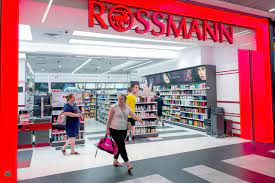

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno
import re
import nltk

# Data Preprocessing libraries
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

# ML Models Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Evaluation Metrics Libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Hyperparameter Technique Libraries
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [2]:
# Mount Google Drive Content
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset from Google Drive
dir_path = '/content/drive/MyDrive/'
rossmann = pd.read_csv('/content/Rossmann Stores Data.csv') # Mention Dataset path
store = pd.read_csv('/content/store.csv')

<ipython-input-5-4e3c01874a53>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossmann = pd.read_csv('/content/Rossmann Stores Data.csv') # Mention Dataset path


### Dataset First View

In [4]:
# Top 5 rows of rossmann data set
rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [6]:
# Top 5 rows of store dataset
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
# Total rows and columns of rossmann data set.
print(f'Rossmann = {rossmann.shape[0]} Rows , {rossmann.shape[1]} columns.')

Rossmann = 1017209 Rows , 9 columns.


In [ ]:
# Total rows and columns of Store data set.
print(f'Store = {store.shape[0]} Rows , {store.shape[1]} columns.')

Store = 1115 Rows , 10 columns.


### Dataset Information

In [7]:
# Dataset Information

In [8]:
# Information about rossmann dataset.
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868510 entries, 0 to 868509
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          868510 non-null  int64  
 1   DayOfWeek      868510 non-null  int64  
 2   Date           868510 non-null  object 
 3   Sales          868510 non-null  int64  
 4   Customers      868510 non-null  int64  
 5   Open           868509 non-null  float64
 6   Promo          868509 non-null  float64
 7   StateHoliday   868509 non-null  object 
 8   SchoolHoliday  868509 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 59.6+ MB


In [ ]:
# Information  about Store dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [9]:
# Check duplicate values in rossmann dataset
rossmann.duplicated().sum()

0

In [10]:
# Check duplicates values  of Store dataset
store.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count

In [12]:
# check missing / null value of rossmann dataset
rossmann.isnull().sum().sort_values(ascending = False)

Open             1
Promo            1
StateHoliday     1
SchoolHoliday    1
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
dtype: int64

In [13]:
# Check missing/null values of store data set.
store.isnull().sum().sort_values(ascending = False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

In [14]:
# Visualizing the missing values

In [15]:
# import visualization library
import missingno as msno

<Axes: >

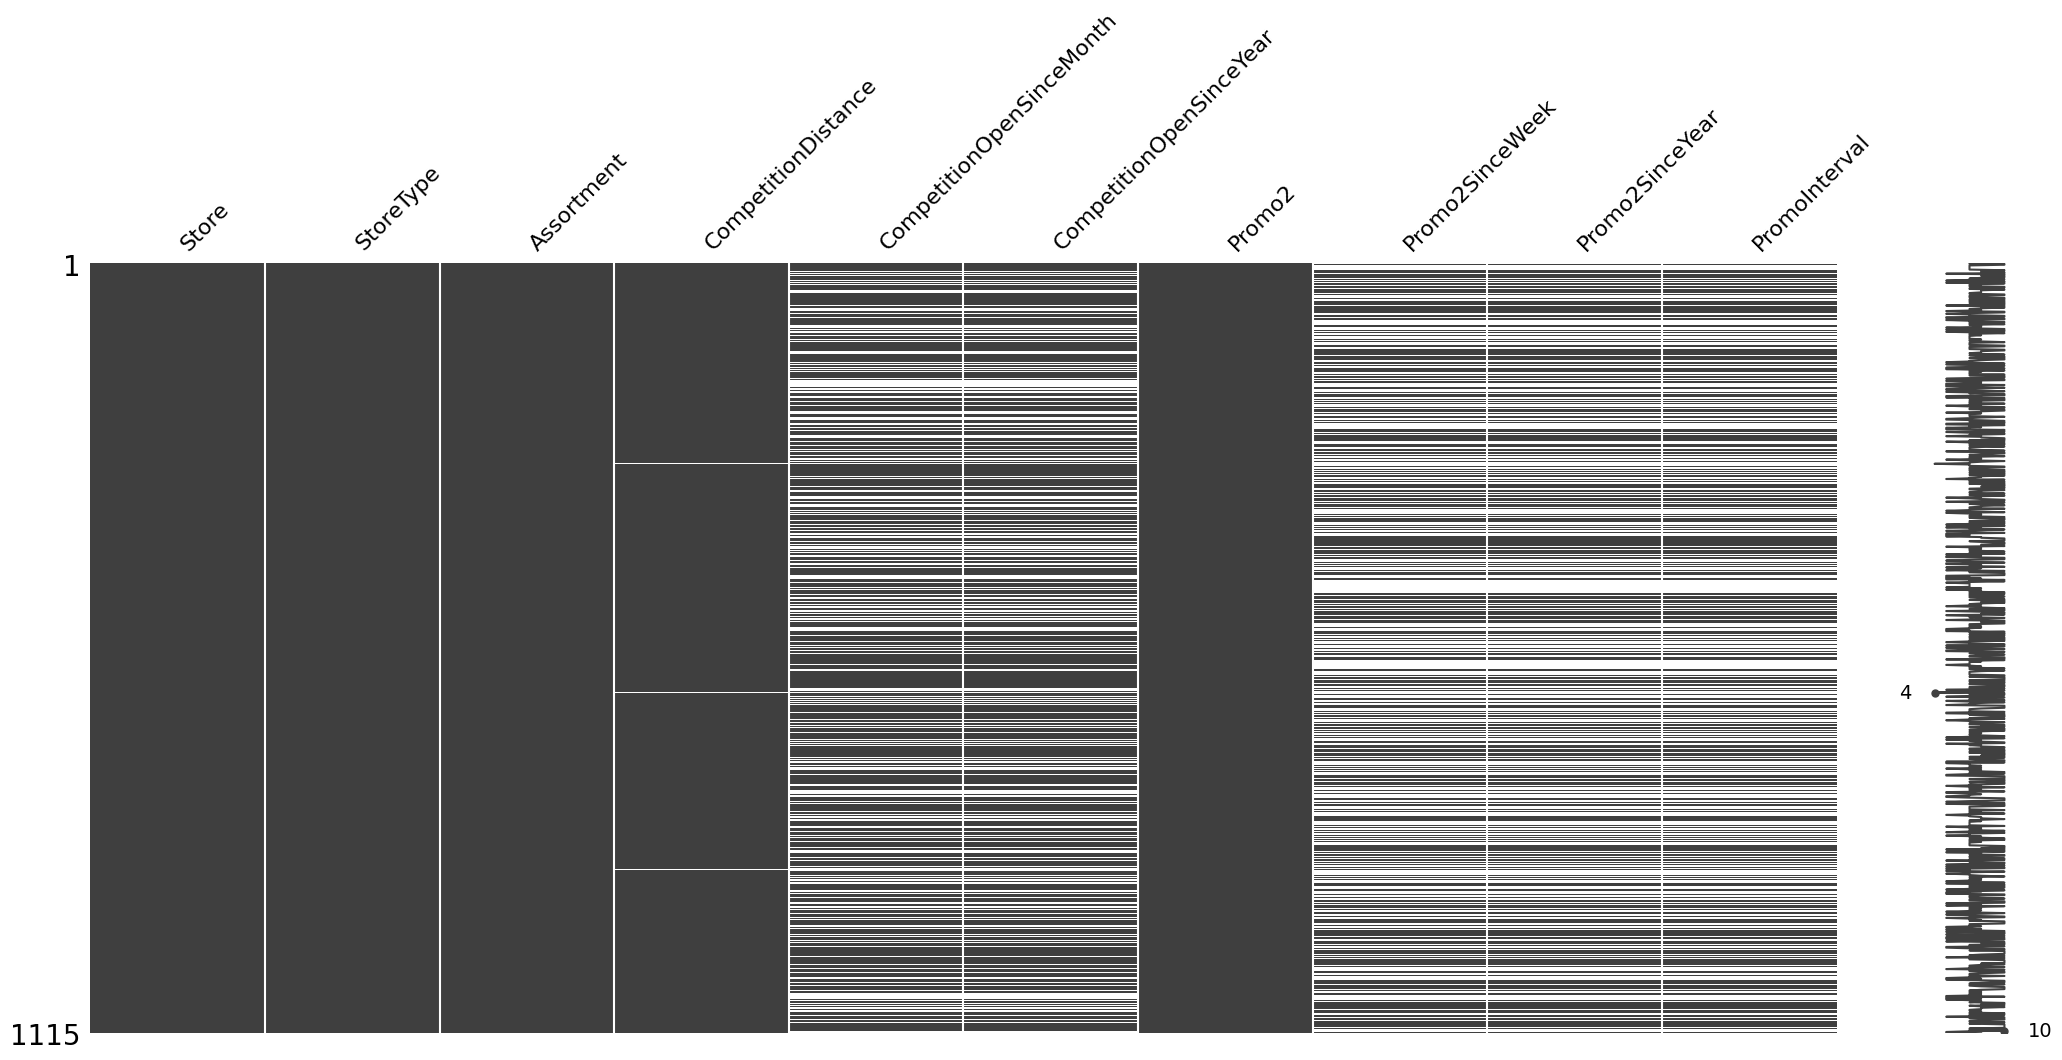

In [16]:
# Visualize  the missing values
msno.matrix(store)

<Axes: >

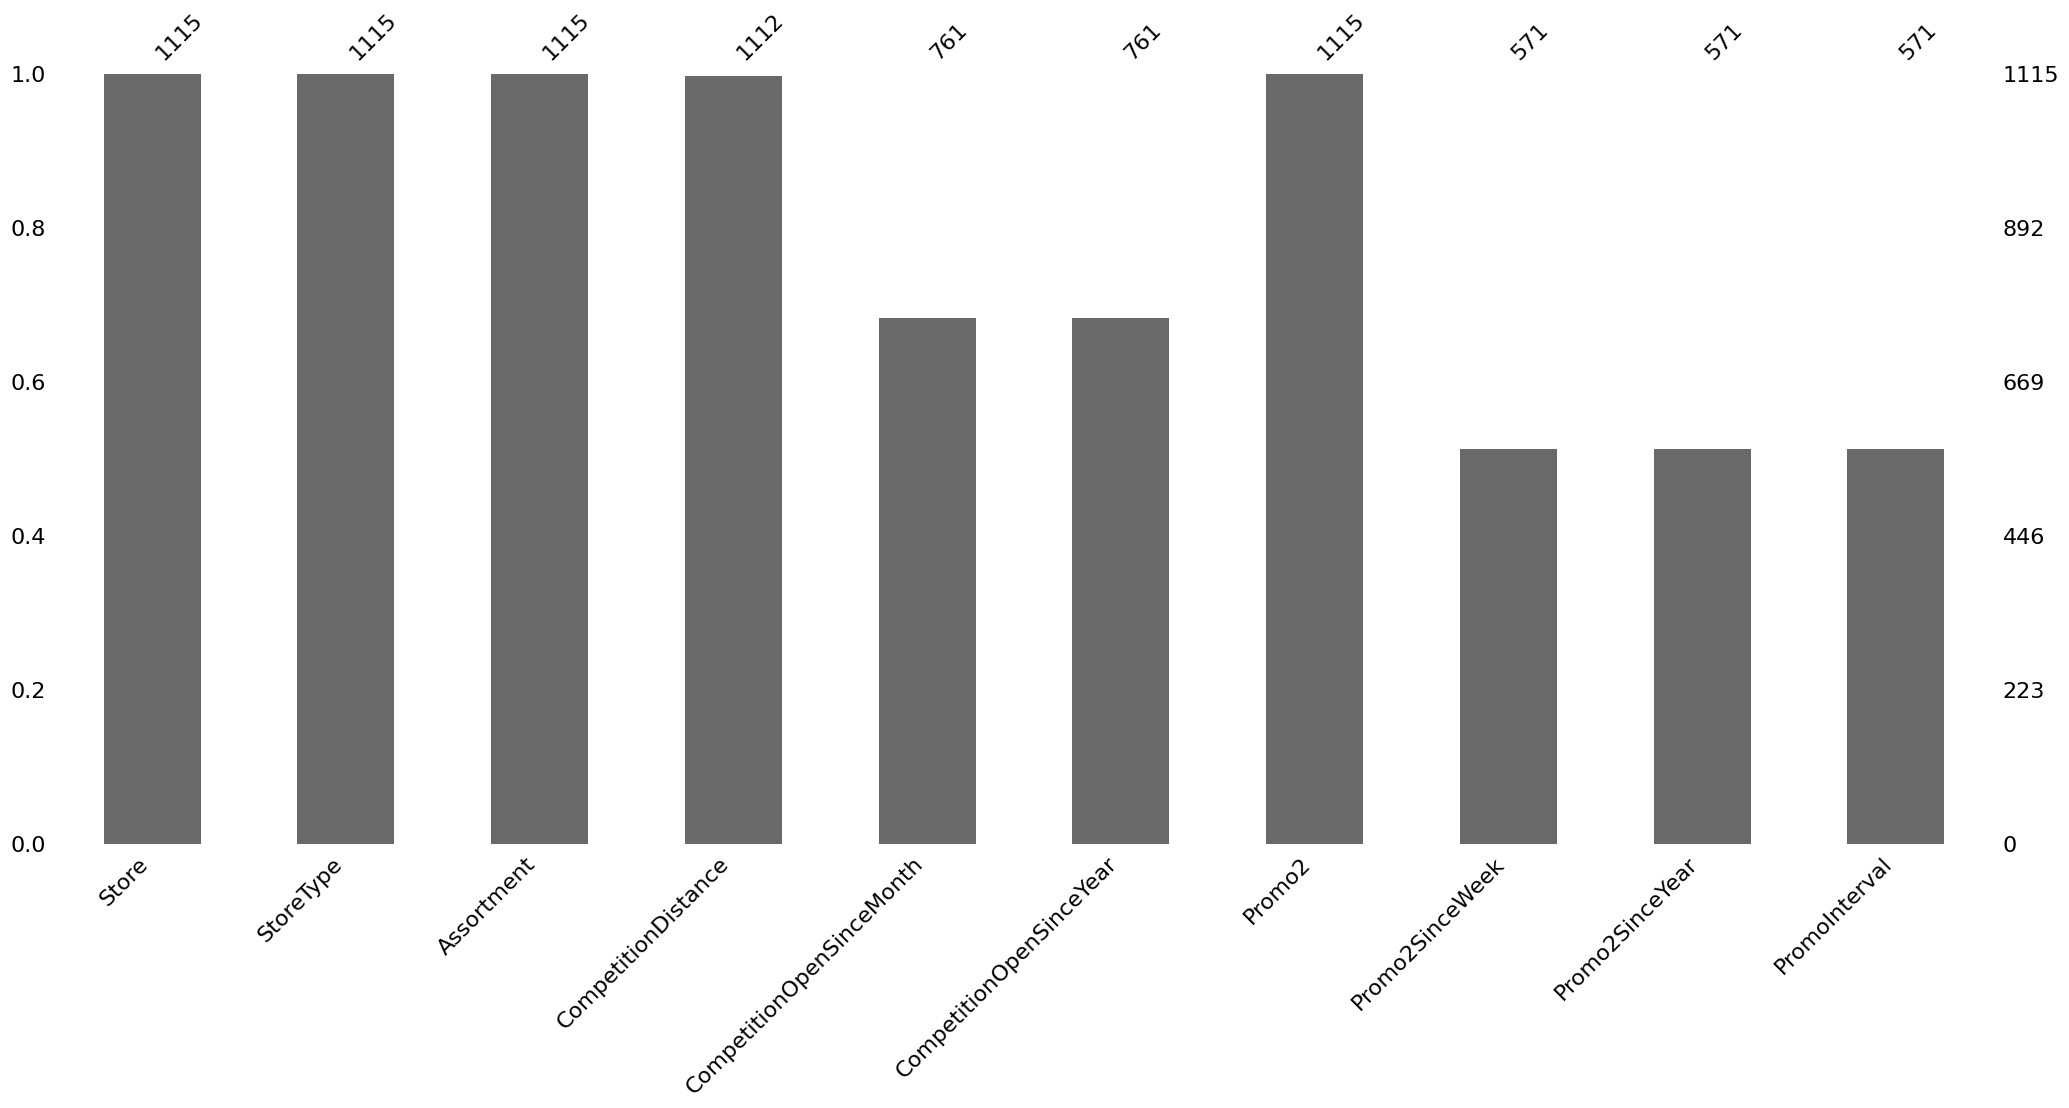

In [17]:
# visualizes missing values using bar chart.
msno.bar(store)

### What did you know about your dataset?

We have a Dataset of Rossmann Stores which contain 1017209 rows and 18 colums. Some columns have missing values.


*   CompetitionDistance have 3 null Values
*   CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 null values.
*   Promo2SinceWeek ,Promo2SinceYear and PromoInterval have 544 null values.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [18]:
# check which how many types of columns in our rossmann data set
rossmann.keys()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [19]:
# check which how many types of columns in our store data set
store.keys()

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe

In [21]:
# check how many numeric values in our rossmann data set.
rossmann.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,868510.000000,868510.000000,868510.000000,868510.000000,868509.000000,868509.000000,868509.000000
mean,558.338254,3.998987,5827.603686,636.713649,0.831945,0.380893,0.186821
std,321.888977,1.996944,3864.841118,465.031321,0.373915,0.485607,0.389768
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3785.000000,410.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5793.000000,613.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,7911.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,5494.000000,1.000000,1.000000,1.000000


In [22]:
# Check how many numeric value in our store data set.
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

Data Fields

 1. Id - an Id that represents a (Store, Date) duple within the test set
 2. Store - a unique Id for each store
 3. Sales - the turnover for any given day (this is what you are predicting)
 4. Customers - the number of customers on a given day
 5. Open - an indicator for whether the store was open: 0 = closed, 1 = open
 6. StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
 7. SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
 8. StoreType - differentiates between 4 different store models: a, b, c, d
 9. Assortment - describes an assortment level: a = basic, b = extra, c = extended
 10. CompetitionDistance - distance in meters to the nearest competitor store
 11. CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
 12. Promo - indicates whether a store is running a promo on that day
 13. Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
 14. Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
 15. PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variabl of rosmann data sate.
for col in rossmann.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',rossmann[col].unique())


The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column DayOfWeek are [5 4 3 2 1 7 6]
The unique values in column Customers are [ 555  625  821 ... 4823 5024   35]
The unique values in column Open are [ 1.  0. nan]
The unique values in column Promo are [ 1.  0. nan]
The unique values in column StateHoliday are ['0' 'a' 'b' 'c' 0 nan]
The unique values in column SchoolHoliday are [ 1.  0. nan]


In [24]:
# Check unique values for each variables of store data set.
for col in store.columns:
  if col in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'The unique values in column {col} are',store[col].unique())


The unique values in column Store are [   1    2    3 ... 1113 1114 1115]
The unique values in column StoreType are ['c' 'a' 'd' 'b']
The unique values in column Assortment are ['a' 'c' 'b']
The unique values in column CompetitionOpenSinceMonth are [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
The unique values in column CompetitionOpenSinceYear are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
The unique values in column Promo2 are [0 1]
The unique values in column Promo2SinceWeek are [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
The unique values in column Promo2SinceYear are [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
The unique values in column PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [25]:
# Check number of unique values of our data rosmmann data set.
rossmann.nunique()

Store             1115
DayOfWeek            7
Date               809
Sales            21223
Customers         4034
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [26]:
# Check number of unique value of our store date set.
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# Write your code to make your dataset analysis ready.

In [28]:
# Merge Dataset
df = pd.merge(rossmann, store, how='left', on='Store')

In [29]:
# Split the date colunmn into date , month and year.
df['year'] = df['Date'].apply(lambda x : x.split('-')[0])
df['month'] = df['Date'].apply(lambda x : x.split('-')[1])
df['date'] = df['Date'].apply(lambda x : x.split('-')[2])

In [30]:
# Delete date column
del df['Date']

In [31]:
# Check Sales in every month.
result = df.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)

   month      Sales
0     01  386596517
1     02  357200135
2     03  398651537
3     04  392463863
4     05  493677954
5     06  578112775
6     07  595059205
7     08  361791202
8     09  342570131
9     10  351878728
10    11  369498877
11    12  433831153


In [32]:
# Fill null values with 0
df['Promo2SinceWeek'].fillna(0, inplace = True)
df['Promo2SinceYear'].fillna(0, inplace = True)
df['PromoInterval'].fillna(0, inplace = True)


In [33]:
# Merge 0 in 0
df.loc[df['StateHoliday'] == '0' , 'StateHoliday']=0

In [34]:
df['StateHoliday'].value_counts()

0    843342
a     16607
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [35]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date
0,1,5,5263,555,1.0,1.0,0,1.0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31
1,2,5,6064,625,1.0,1.0,0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31
2,3,5,8314,821,1.0,1.0,0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31
3,4,5,13995,1498,1.0,1.0,0,1.0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31
4,5,5,4822,559,1.0,1.0,0,1.0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31


### **What all manipulations have you done and insights you found?**



*   First I merges Both Data Set Rossmann or Store
*   Then after merge dataset we make date, month and year separate column and drop Date Columns From Dataset
*  Check Sales in a month using groupby method
*  Promo2SinceWeek ,Promo2SinceYear and PromoInterval fill null value with 0
*  Stateholiday has 5 unique values 0 ,0 a, b,and c we merge both 0 make and one 0



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Bar Chart)

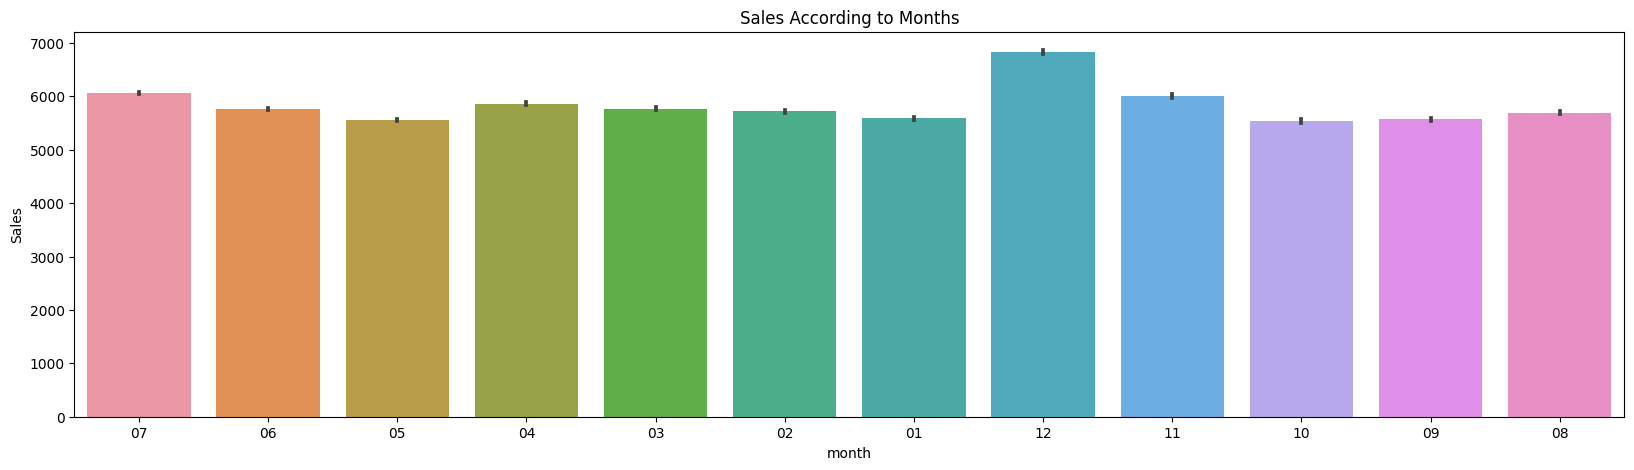

In [36]:
# Chart - 1 Visualization code
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=df , x='month' , y = 'Sales' , ax=ax)
ax.set(title = 'Sales According to Months')
plt.show()

##### 1. Why did you pick the specific chart?
I picked a bar chart for the visualization code because it is a good way to compare sales across different months. Bar charts are easy to understand and interpret, and they are a good choice for displaying data that is not continuous.


##### 2. What is/are the insight(s) found from the chart?


Sales are highest during three month of the year i.e.,July, November and December and least sales are during the month of May

#### Chart - 2 Point Plot

In [37]:
# Chart - 2 Visualization code

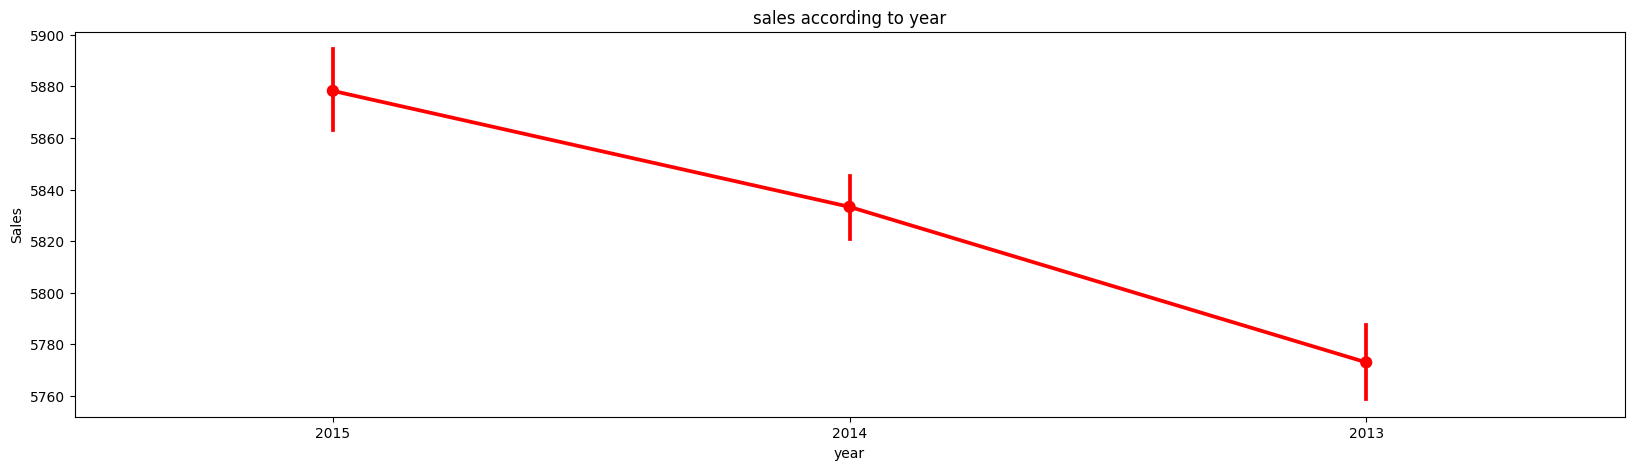

In [38]:
fig,ax=plt.subplots(figsize=(20,5))
sns.pointplot(data=df , x='year' , y = 'Sales' , ax=ax, color='Red')
ax.set(title = 'sales according to year')
plt.show()

##### 1. Why did you pick the specific chart?

This plotchart shows relation between years.
I picked a point plot  because it is a good way to show the distribution of sales data across different years. Point plots are similar to scatter plots, but they use points instead of symbols. This makes them easier to read and interpret, especially when there is a lot of data.

##### 2. What is/are the insight(s) found from the chart?

Sales is  increase year by year 2013 has less sales,in 2014 Sales Up  Sales bit increase in 2015.


#### Chart - 3

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2000x500 with 0 Axes>

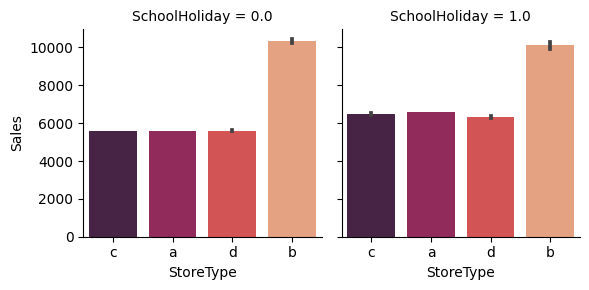

In [39]:
# Chart - 3 visualization code
plt.figure(figsize = (20,5))
g = sns.FacetGrid(df, col="SchoolHoliday")
g.map(sns.barplot, "StoreType", "Sales",palette= "rocket");
plt.show()

##### 1. Why did you pick the specific chart?


You picked a faceted bar chart for the visualization code because it is a good way to compare sales across different store types, while also taking into account the effect of school holidays. Faceted bar charts are a type of small multiples plot, which means that they display multiple plots of the same data, but with each plot conditioned on a different value of a categorical variable. In this case, the categorical variable is school holidays.


##### 2. What is/are the insight(s) found from the chart?

School close = 0

School open =  1

We can say that Storetype 'd' have more Sale when Schools are closed and when School are open it have less sales as compared on holiday And vise versa for store type'b', type c & d doesn't effect much like 'b' and 'c



#### Chart - 4

In [40]:
# Chart - 4 visualization code

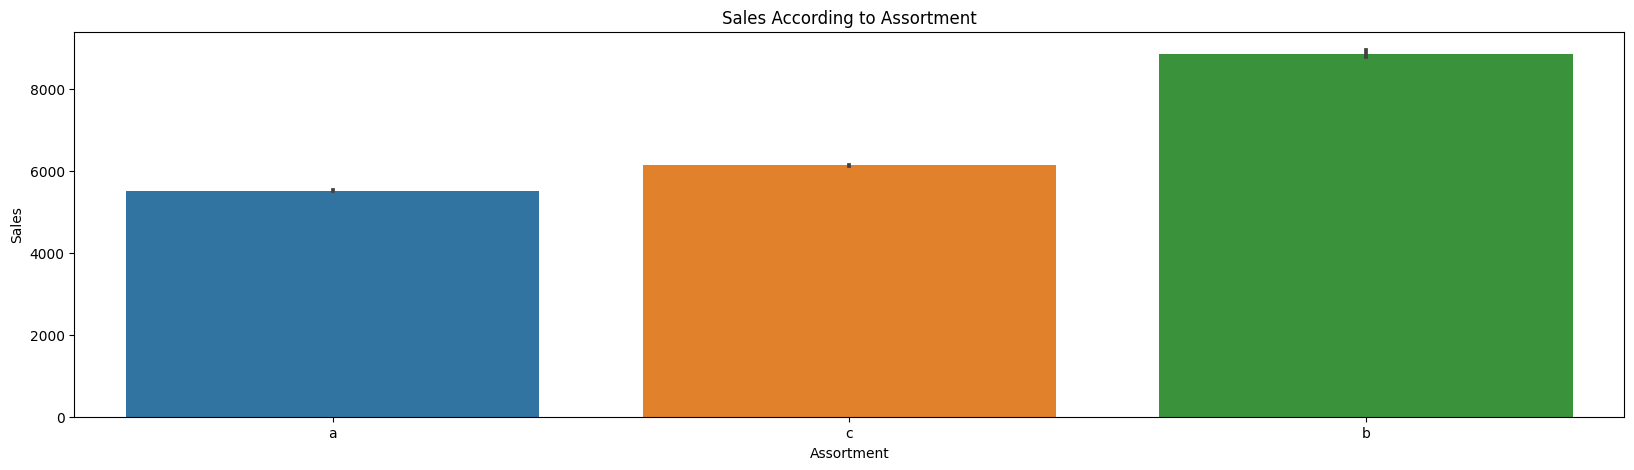

In [41]:
fig,ax=plt.subplots(figsize=(20,5))
sns.barplot(data=df , x='Assortment' , y = 'Sales' , ax=ax )
ax.set(title = 'Sales According to Assortment')
plt.show()

##### 1. Why did you pick the specific chart?

You picked a bar chart for the visualization code because it is a good way to compare sales across different assortments. Bar charts are easy to understand and interpret, and they are a good choice for displaying data that is not continuous..

##### 2. What is/are the insight(s) found from the chart?

Assortment "B (extra)" has the highest sales.
Assortment "C" has the second highest sales.
Assortment "A" has the lowest sales.

---



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by helping the business to make better decisions about how to allocate resources and promote different products or services. For example, by allocating more resources to assortment "B (extra)," the business can increase its sales of this assortment. By promoting assortment "B (extra)" to customers who are willing to pay a premium, the business can increase its overall revenue.


#### Chart - 5 (Pie Chart)

In [42]:
# Chart - 5 visualization code

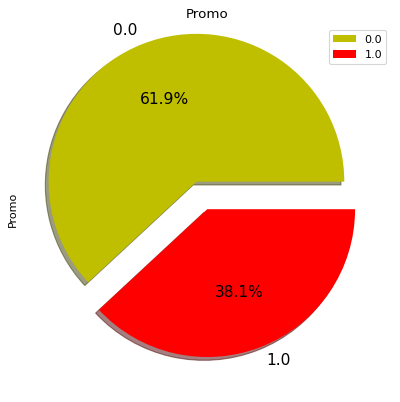

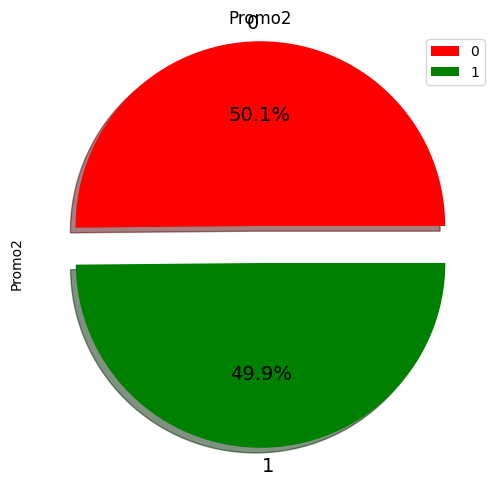

In [43]:
plt.figure(figsize=(12,7), dpi=80)

labels = 'Not Promo','Promo'
df['Promo'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.2, 0.0), colors = ['y','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Promo")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)
plt.show()

df['Promo2'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode = (0.2, 0.0),colors = ['red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
label= 'Not Promo','Promo'
plt.title("Promo2")
fig=plt.gcf()
plt.legend(loc="best")
fig.set_size_inches(6,6)

##### 1. Why did you pick the specific chart?


We picked the pie chart for the visualization code because it is a good way to compare the proportions of different categories. Pie charts are easy to understand and interpret, and they are a good choice for displaying data that is categorical.t



##### 2. What is/are the insight(s) found from the chart?



In promo - 61.8 % running stores are not participating in promo.
In promo 2 - only 50.1 % stores are continueing participate in Promo.
The majority of sales are not from promo products.
Promo products account for a small proportion of sales.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by helping the business to make better decisions about how to allocate resources and promote different products. For example, by knowing that the majority of sales are not from promo products, the business can focus its resources on promoting other products or services. By knowing that promo products account for a small proportion of sales, the business can be more selective about which products to offer on promo and how much to spend on promo marketing campaigns.

#### Chart - 6 (Bar plot)

In [44]:
# Chart - 6 Visualization code

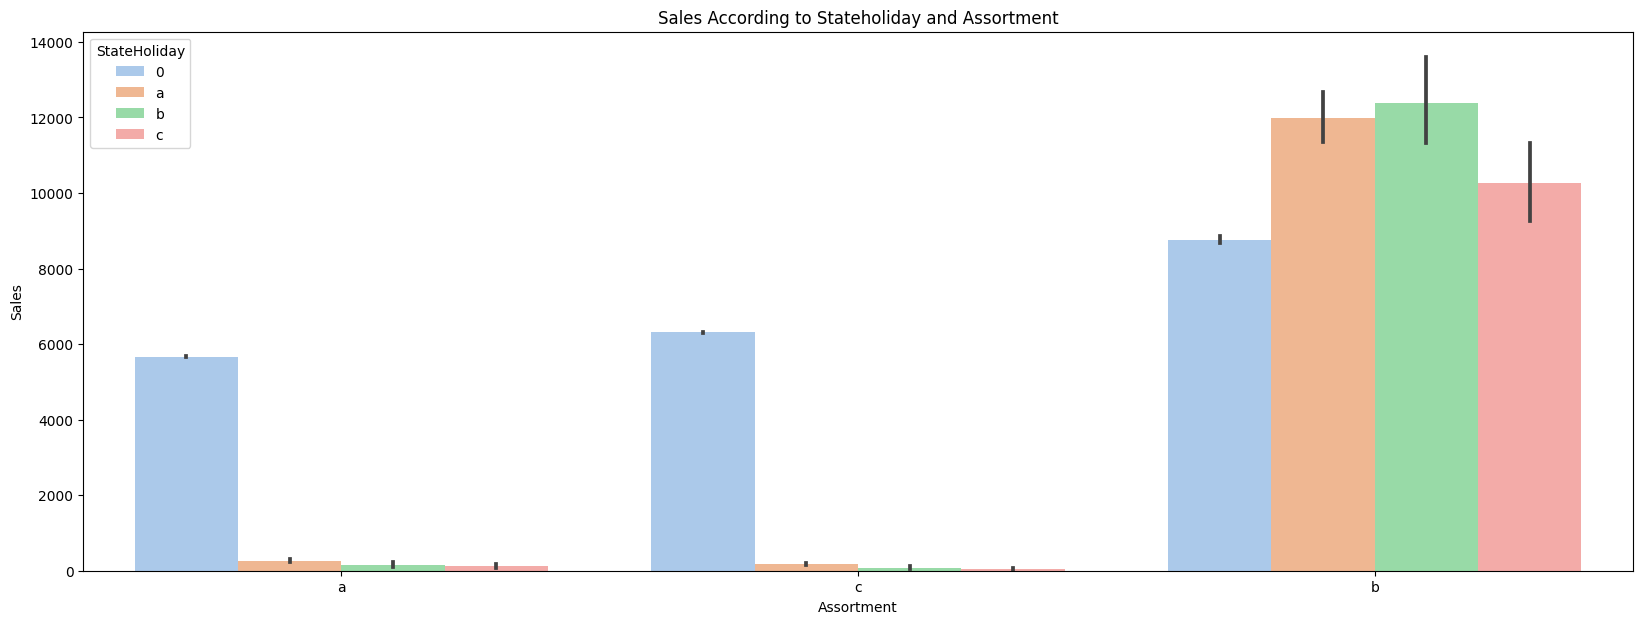

In [45]:
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(data=df , x='Assortment' , y = 'Sales' ,hue = 'StateHoliday' , ax=ax , palette = 'pastel')
ax.set(title = 'Sales According to Stateholiday and Assortment')
plt.show()

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

Sales are highest during public holidays.
Sales are lowest during religious holidays.
Assortment "B" has the highest sales, regardless of state holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By knowing that sales are highest during public holidays, the business can allocate more resources to serving customers during this time. By knowing that sales are lowest during religious holidays, the business can adjust its staffing and inventory levels accordingly.The business can create special offers or bundle products to increase the sales during the religious festivals, or they can decide to remain close during these festivals to reduce running cost or expenses.

#### Chart - 7

In [46]:
# Chart - 7 visualization code

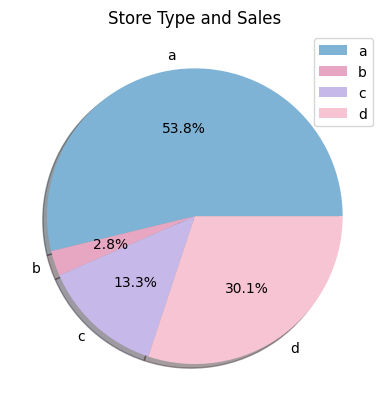

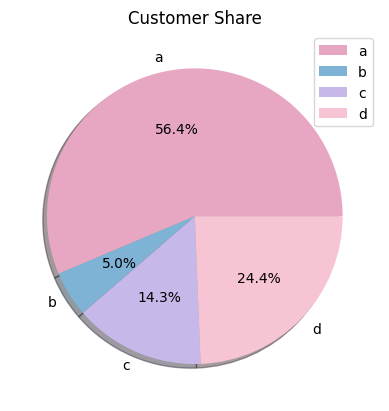

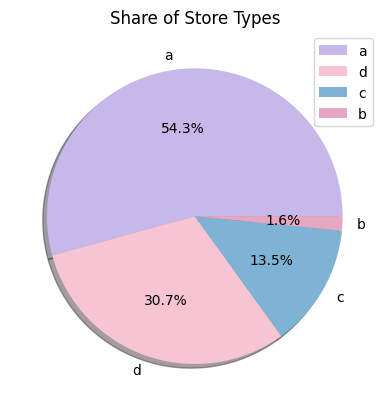

In [47]:
# Sum of sales by store type
sales_by_store_type = df.groupby("StoreType")["Sales"].sum()

# Plotting pie chart of sales by store type
fig, ax = plt.subplots()
ax.pie(sales_by_store_type, labels=sales_by_store_type.index, autopct='%1.1f%%', shadow=True, colors=['#7FB3D5', '#E7A7C2', '#C7B8EA', '#F6C4D2'])
ax.set_title('Store Type and Sales')
plt.legend()
plt.show()

# Sum of customers by store type
customers_by_store_type = df.groupby("StoreType")["Customers"].sum()

# Plotting pie chart of customers by store type
fig, ax = plt.subplots()
ax.pie(customers_by_store_type, labels=customers_by_store_type.index, autopct='%1.1f%%', shadow=True, colors=['#E7A7C2', '#7FB3D5', '#C7B8EA', '#F6C4D2'])
ax.set_title('Customer Share')
plt.legend()
plt.show()

# Count of store types in the dataset
store_types = df["StoreType"].value_counts()

# Plotting pie chart of store types in the dataset
fig, ax = plt.subplots()
ax.pie(store_types, labels=store_types.index, autopct='%1.1f%%', shadow=True, colors=['#C7B8EA', '#F6C4D2', '#7FB3D5', '#E7A7C2'])
ax.set_title('Share of Store Types')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

We picked the pie chart for the visualization code because it is a good way to compare the proportions of different categories. Pie charts are easy to understand and interpret, and they are a good choice for displaying data that is categorical.
A pie chart represents numbers in percentages, and the total sum of all the divided segments equals 100 percent

##### 2. What is/are the insight(s) found from the chart?

As my observation there are 4 types of stores A ,B, C and D

* But upon further exploration it can be clearly observed that the highest sales belonged to the store type **A** due to the high number of type a stores in our dataset. Store type A and C had a similar kind of sales and customer share

* A bar plot is a visualization tool that shows an estimate of central tendency for a numeric variable using the height of each rectangle. Initially, the bar plot showed that store type B had the highest sales on average, indicating it as the most profitable store type. Further exploration revealed that store type a had the highest sales due to its high representation in the dataset, while store types A and C had similar sales and customer shares. Interestingly, store type B had the highest average sales and per store revenue generation, which may be attributed to its use of all three assortment strategies, as observed earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by helping the business to make better decisions about how to allocate resources and promote different stores. For example, by knowing that store type A has the highest sales and customer share, the business can allocate more resources to this store type. By knowing that store type B has the highest average sales and per store revenue generation, the business can focus on promoting this store type to customers who are willing to pay a premium.
Increase number of stores like B, C, and also D type stores only A type of stores spread everywhere.


#### Chart - 8

In [48]:
# Chart - 8 Visualization code

Text(0.5, 1.0, 'Store Daily Promo Countplot')

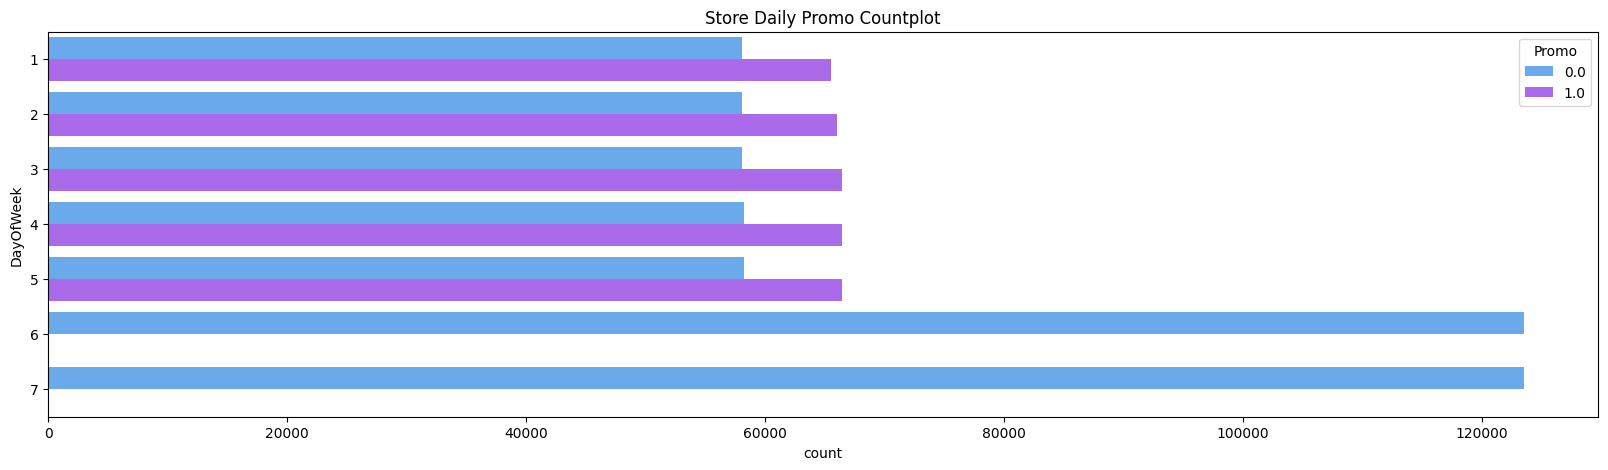

In [49]:
plt.figure(figsize = (20,5))
sns.countplot(y= 'DayOfWeek', hue='Promo', data= df, palette= 'cool')
plt.title('Store Daily Promo Countplot')

##### 1. Why did you pick the specific chart?

We picked the countplot for the visualization code because it is a good way to show the frequency of each category in a categorical variable. Countplots are easy to understand and interpret, and they are a good choice for displaying data that is categorical.

##### 2. What is/are the insight(s) found from the chart?

There are more promos on the weekends (Saturday and Sunday) than on weekdays.
Sunday has the highest number of promos, followed by Saturday.
Monday has the lowest number of promos.
The number of promos on Tuesday, Wednesday, and Thursday are similar.
First 5 day of week promotion in stores,only weekend no promotion in stores

#### Chart - 9

In [50]:
# Chart - 9 Visualization code

Text(0.5, 1.0, 'According Week of Days Store Open or Close')

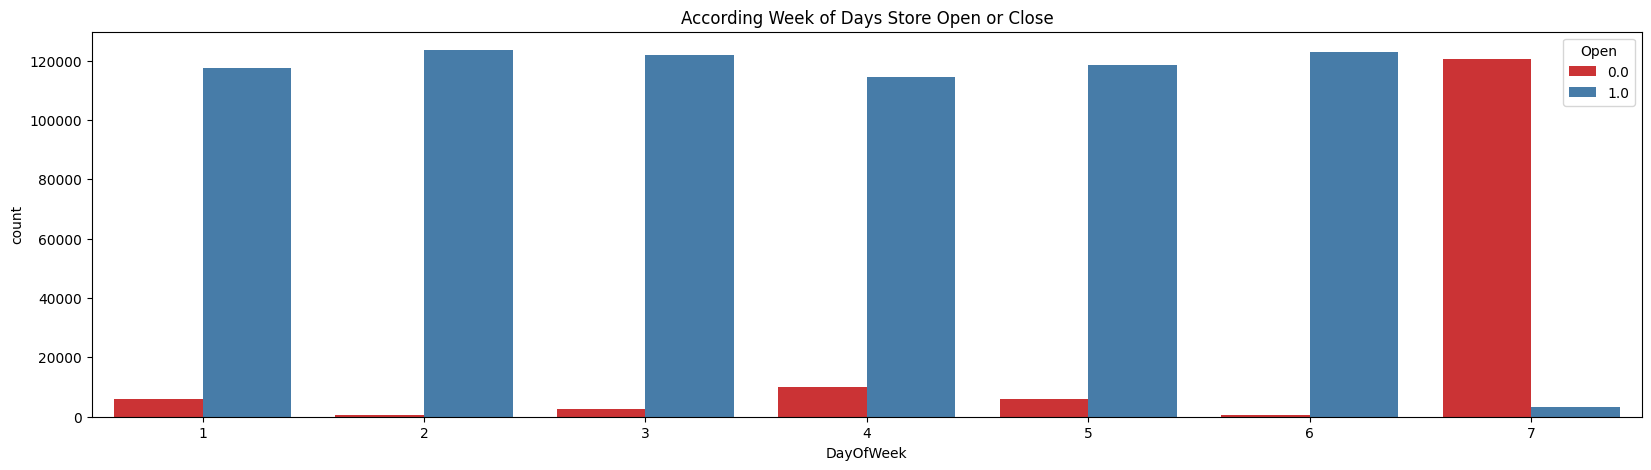

In [51]:
plt.figure(figsize = (20,5))
sns.countplot( x='DayOfWeek', data=df, hue="Open", palette="Set1")
plt.title('According Week of Days Store Open or Close')

##### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of different categories in our variable: Count plots can help us understand how the values of a variable are distributed within a dataset. This plot is also used to represent count of observations with respect to the variable.

##### 2. What is/are the insight(s) found from the chart?

In this barchart clear show on sunday most of the stores are closes and other day day all stores are opens.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the stores are closes on sunday if 60 % stores are open on sunday, its imapcted positive on sales.


#### Chart - 10

In [52]:
# Chart - 10 visualization code

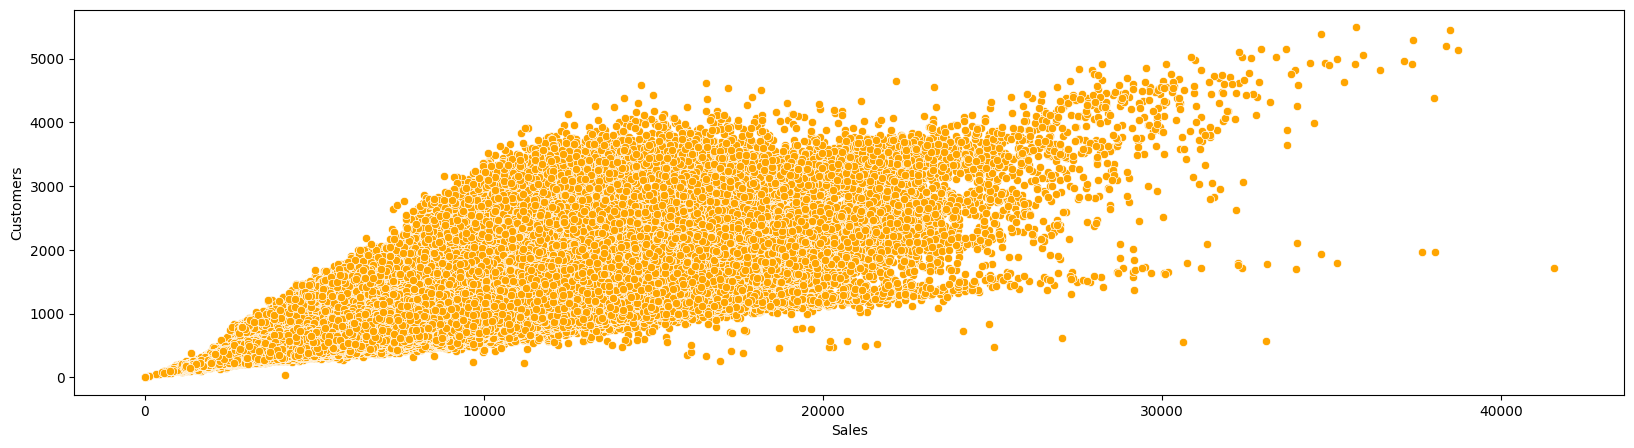

In [53]:
plt.figure(figsize = (20,5))
sns.scatterplot(data=df, x="Sales", y="Customers" , color='orange')
plt.show()

##### 1. Why did you pick the specific chart?


You picked the scatterplot for the visualization code because it is a good way to show the relationship between two numerical variables. Scatterplots are easy to understand and interpret, and they are a good choice for displaying data that is continuou.We have picked a scatter plot to know the relationship between numner of customers visitig stores and total sales

##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation between sales and customers.
This means that as the number of customers increases, sales also increase.
The correlation coefficient is 0.9, which is considered to be a strong correlation.From the above chart it is easy to observe that the correlation between customers and sales is preety good as customers are increasing sales are also healing upside.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


According to our graph customers and sales are highly correlated with each other which from the business point of view it is too good.By knowing that there is a positive correlation between sales and customers, the business can focus its efforts on attracting more customers. This could lead to increased sales and improved profitability.

#### Chart - 11

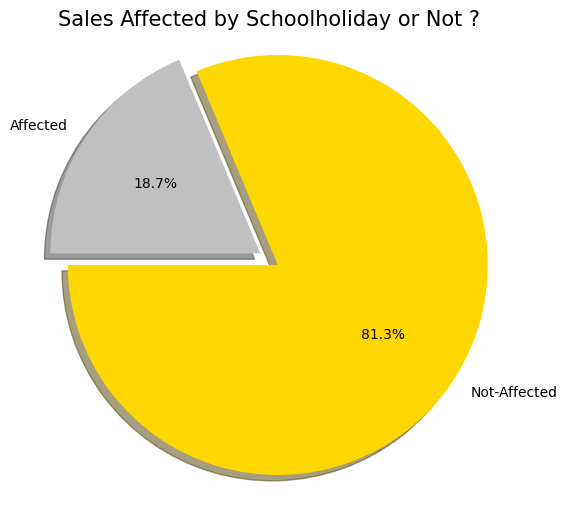

In [54]:
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=15)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

We picked the pie chart for the visualization code because it is a good way to compare the proportions of different categories. Pie charts are easy to understand and interpret, and they are a good choice for displaying data that is categorical..

##### 2. What is/are the insight(s) found from the chart?

82.1% of sales are not affected by school holidays.
17.9% of sales are affected by school holidays.

#### Chart - 12

In [55]:
# Chart - 12 visualization code

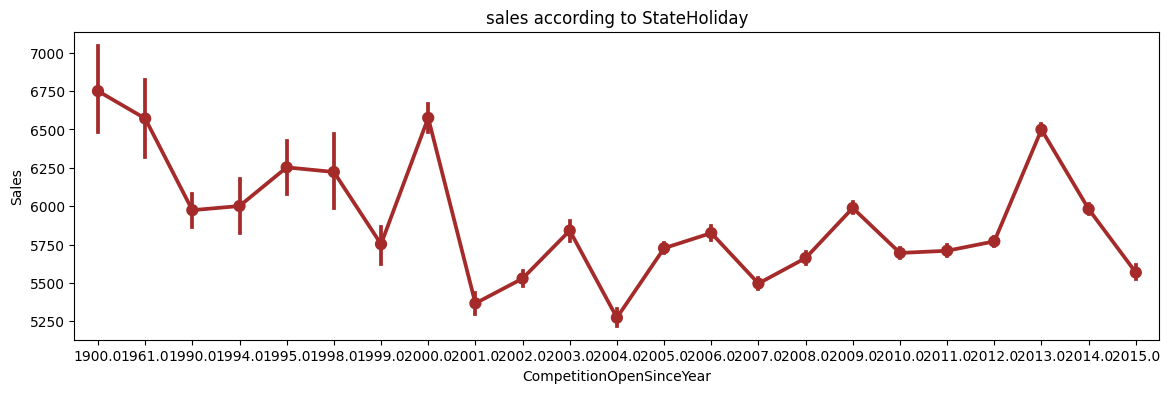

In [56]:
fig,ax=plt.subplots(figsize=(14,4))
sns.pointplot(data=df , x='CompetitionOpenSinceYear' , y = 'Sales' , ax=ax, color='brown')
ax.set(title = 'sales according to StateHoliday')
plt.show()

##### 1. Why did you pick the specific chart?

We picked the point plot for the visualization code because it is a good way to show the distribution of sales data across different years of competition opening. Point plots are easy to understand and interpret, and they are a good choice for displaying data that is continuous and has some variability.We picked this chart to know about the sales every year as there is competitor near the store.

##### 2. What is/are the insight(s) found from the chart?

Sales have generally increased over time.
There is a slight dip in sales in the years 2021 and 2022.
Sales have rebounded in 2023 and are now higher than they were in 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above graph we can observe that there is sudden increase and decrease in sales throughout the years. stores should grip some good and more effective strategy to increase the sales as more competitors are making more difficulties for the stores.

#### Chart - 13

In [57]:
# Chart - 13 visualization code
numerical_values = list(df.describe().columns)
numerical_values

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

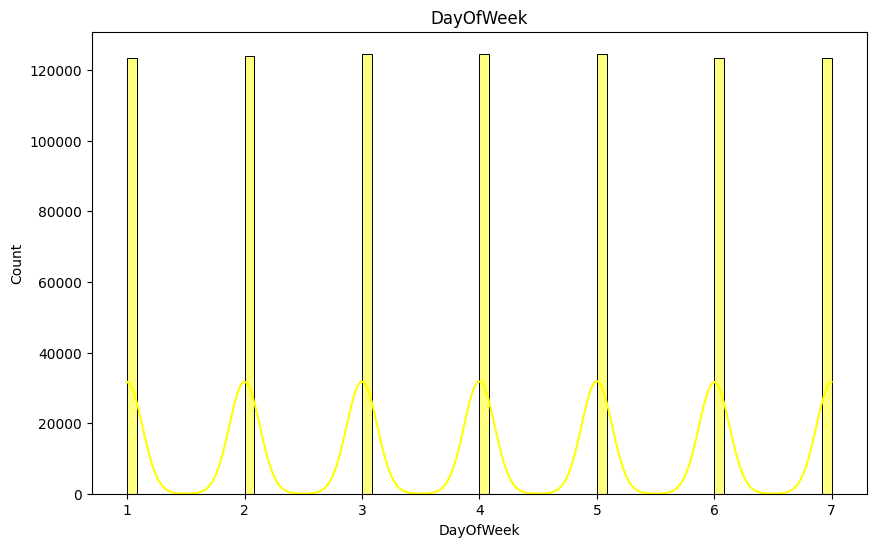

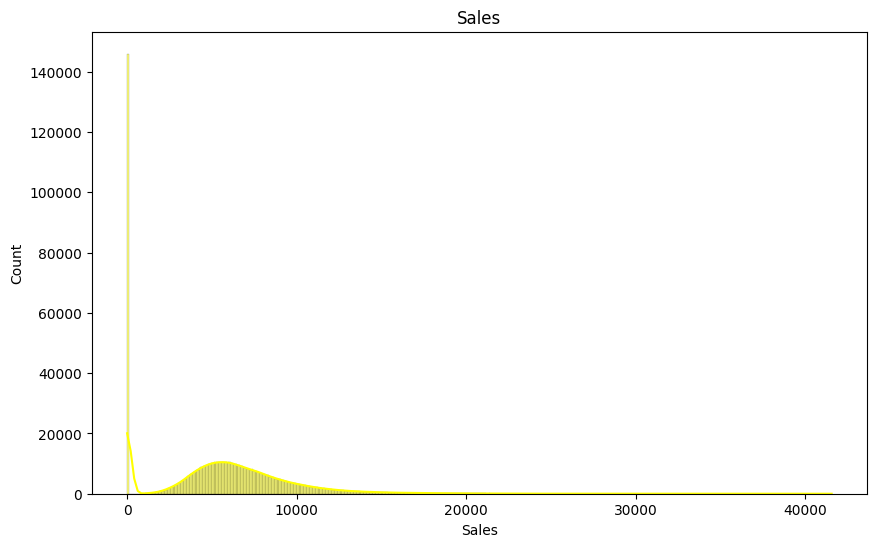

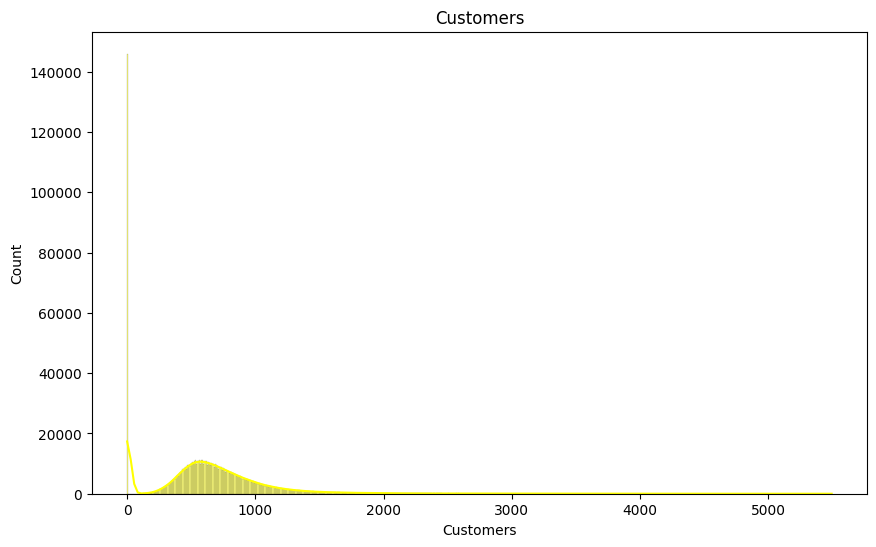

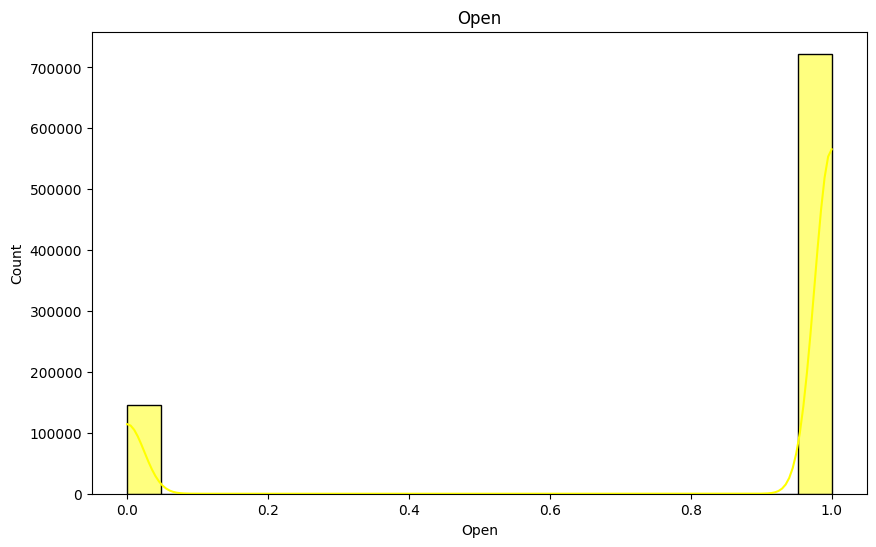

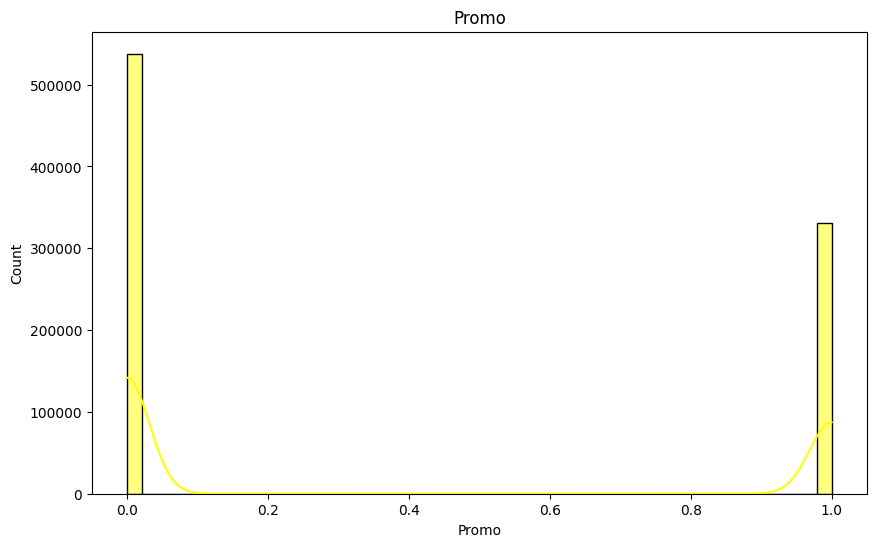

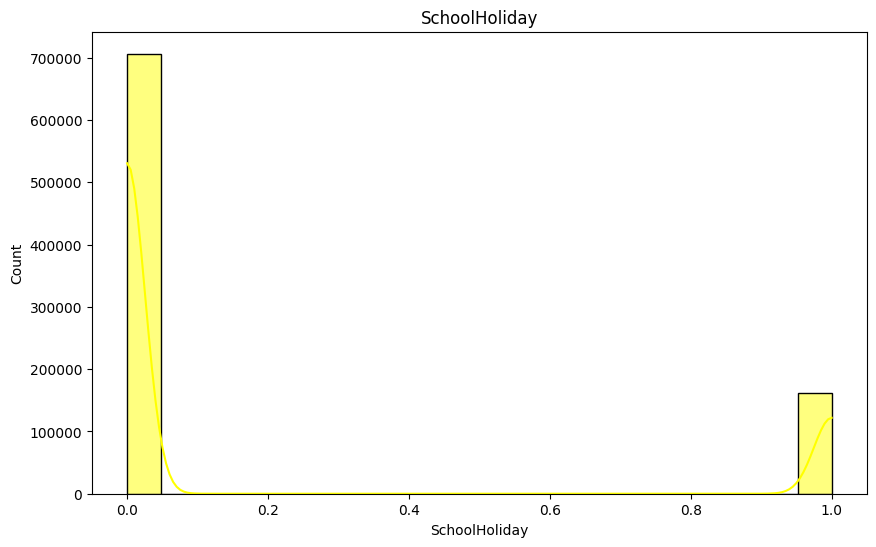

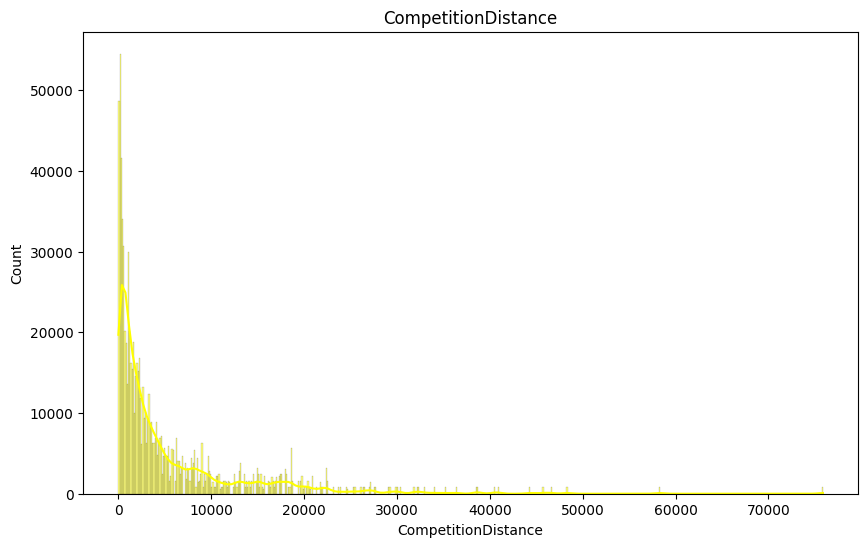

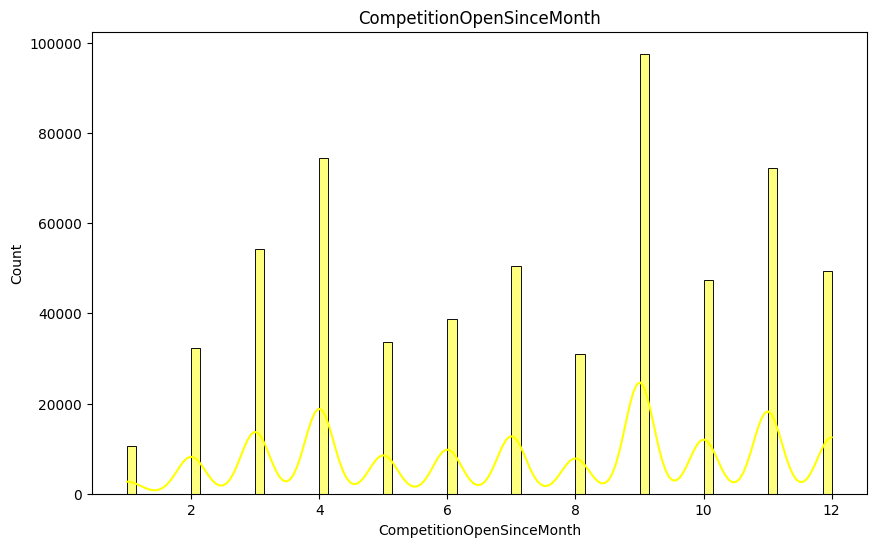

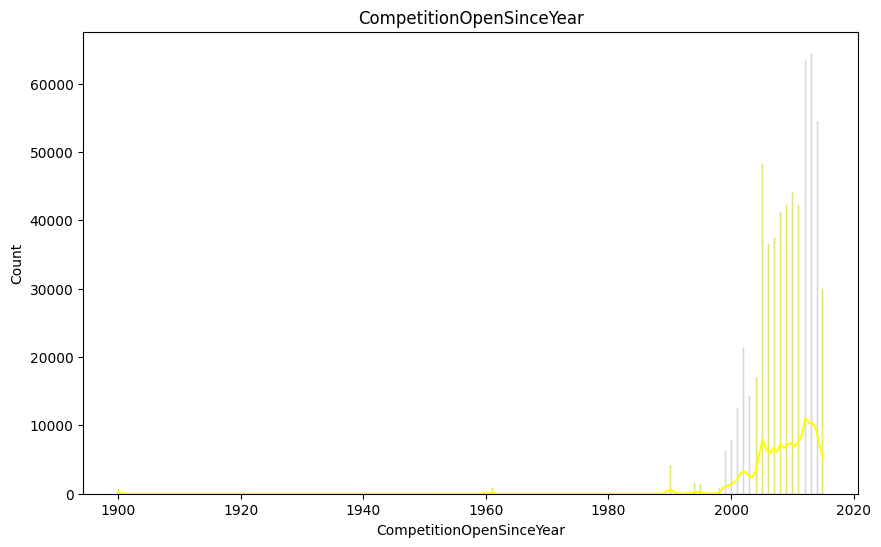

In [58]:
for col in numerical_values[1:-3]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  feature = df[col]
  sns.histplot(feature, ax = ax, kde=True,color ='yellow')
  ax.set_title(col)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Now we can see that some of our features like CompititionDistance now more look like normal distribution. Rest of our feature still not normaly distributed some of feature has multi mode. Beacuse of some features have catagorical values like 1,0.

#### Chart - 14 - Correlation Heatmap

<ipython-input-59-2c1dae9e69be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


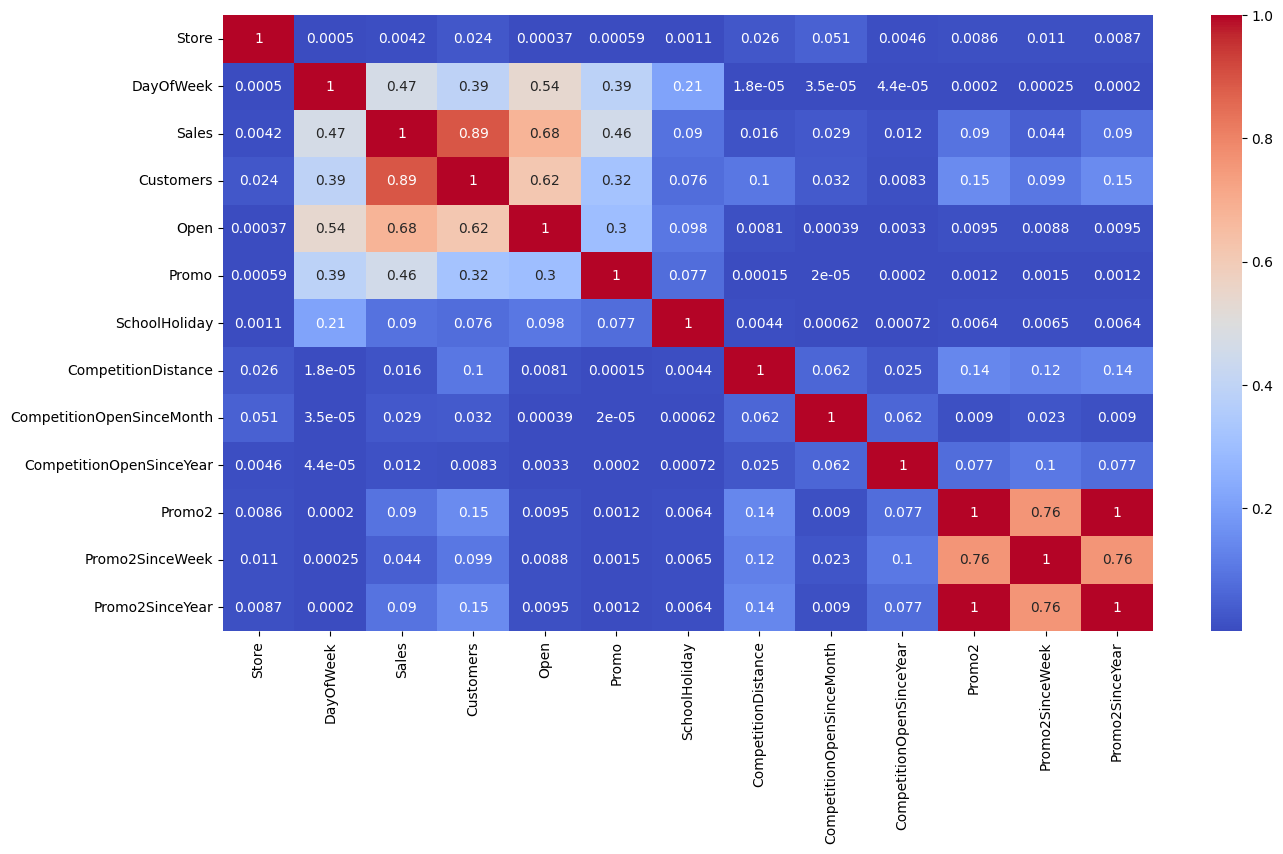

In [59]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap Show correlation between each Variables.

#### Chart - 15 - Pair Plot

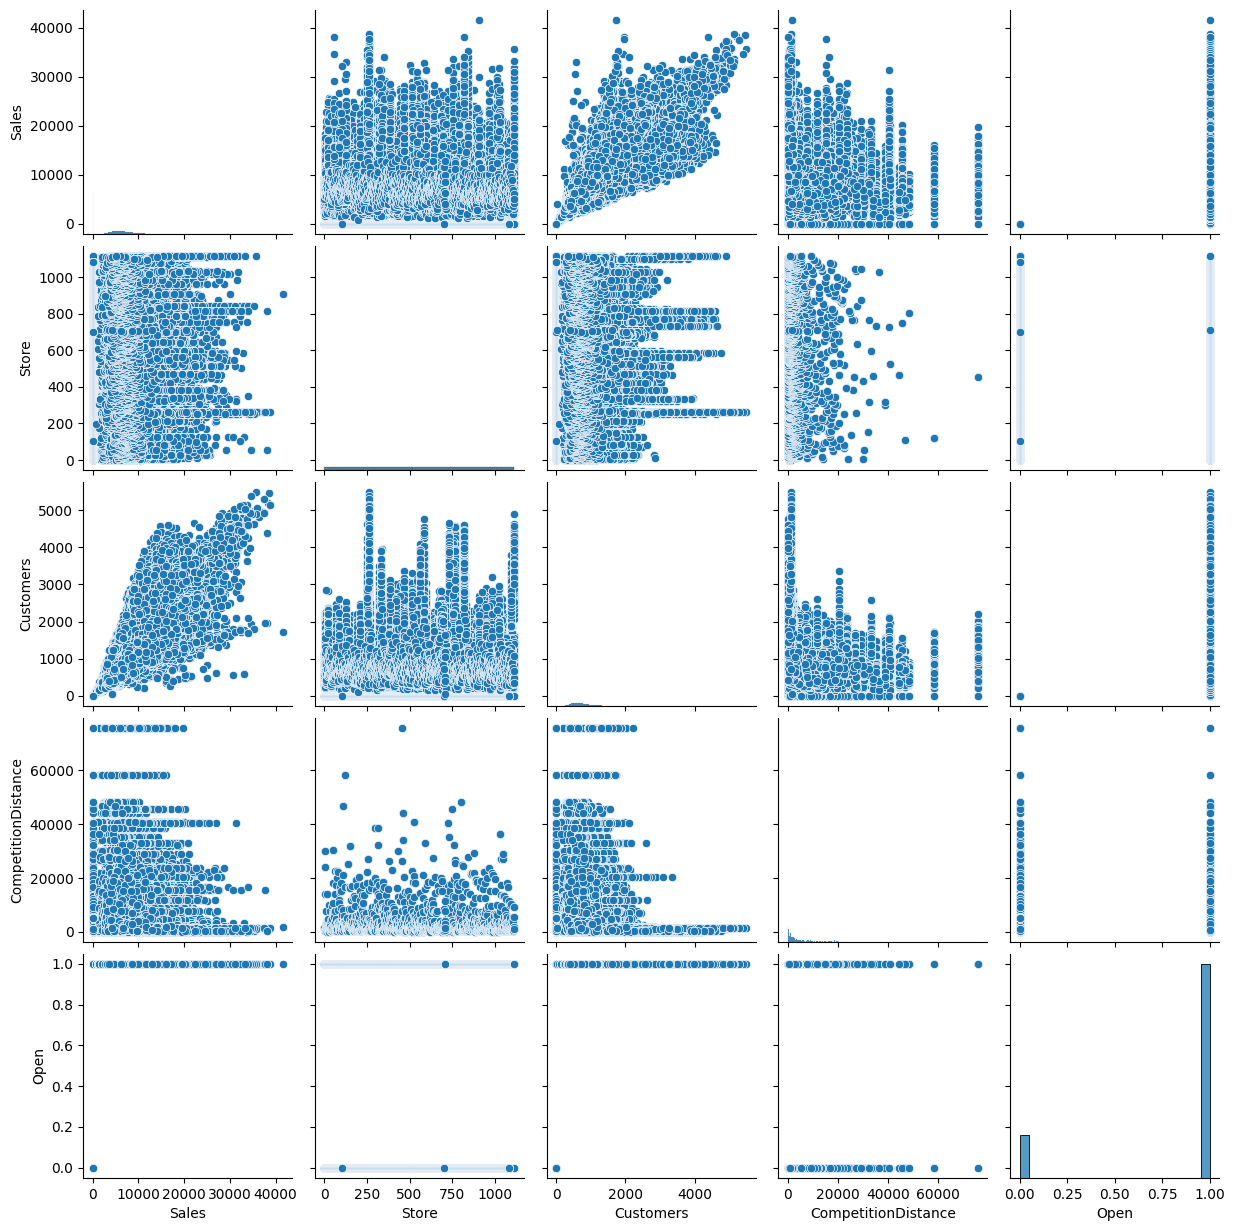

In [60]:
# Pair Plot visualization code
Plot=df[['Sales','Store', 'Customers','CompetitionDistance', 'Open']]
sns.pairplot(Plot)
plt.show()

##### 1. Why did you pick the specific chart?

We picked this specific chart to plot for multiple visuals and various insights related to the data in a single frame.
I picked the pair plot for the visualization code because it is a good way to explore the relationships between multiple variables in a dataset. Pair plots allow you to see both the distribution of each variable individually and the relationship between each pair of variables. This can be helpful for identifying patterns and relationships in the data that might not be obvious from other visualizations.


##### 2. What is/are the insight(s) found from the chart?

 Sales are positively correlated with Customers. This means that as the number of customers increases, sales also increase.
 Sales are negatively correlated with CompetitionDistance. This means that as the distance to the nearest competitor increases, sales also increase.
 Sales are positively correlated with Open. This means that stores that are open for more hours tend to have higher sales.
The distribution of Store is skewed. This means that there are a few stores with very high sales, and many stores with lower sales.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [61]:
# Checking Null Values
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              1
Promo                             1
StateHoliday                      1
SchoolHoliday                     1
StoreType                         0
Assortment                        0
CompetitionDistance            2242
CompetitionOpenSinceMonth    276136
CompetitionOpenSinceYear     276136
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
year                              0
month                             0
date                              0
dtype: int64

In [62]:
# Check the null values
print(df['CompetitionDistance'].isna().sum())
print(df['CompetitionOpenSinceMonth'].isna().sum())
print(df['CompetitionOpenSinceYear'].isna().sum())

2242
276136
276136


In [63]:
# Handling Missing Values & Missing Value Imputation
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [64]:
# Drop Some Columns
df.drop(['Promo2SinceWeek' ,'Promo2SinceYear' , 'PromoInterval'], axis = 1 , inplace = True)

In [65]:
# Recheck the null values
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         1
Promo                        1
StateHoliday                 1
SchoolHoliday                1
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
year                         0
month                        0
date                         0
dtype: int64

In [66]:
# Check information of data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868510 entries, 0 to 868509
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      868510 non-null  int64  
 1   DayOfWeek                  868510 non-null  int64  
 2   Sales                      868510 non-null  int64  
 3   Customers                  868510 non-null  int64  
 4   Open                       868509 non-null  float64
 5   Promo                      868509 non-null  float64
 6   StateHoliday               868509 non-null  object 
 7   SchoolHoliday              868509 non-null  float64
 8   StoreType                  868510 non-null  object 
 9   Assortment                 868510 non-null  object 
 10  CompetitionDistance        868510 non-null  float64
 11  CompetitionOpenSinceMonth  868510 non-null  float64
 12  CompetitionOpenSinceYear   868510 non-null  float64
 13  Promo2                     86

#### What all missing value imputation techniques have you used and why did you use those techniques?

* We may have to drop these last 3 columns, Promo2SinceWeek, Promo2SinceYear, PromoInterval because they have around 50% of null values, but these null values shows that stores are not actually participating in promo2 that's why there are null values, so we have to replace it with 0
* To treat the missing values we have replaced those values using median and mode.

### 2. Handling Outliers

In [67]:
# Name the Countinuous Variables
continuous_value_column = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'DayOfWeek',]

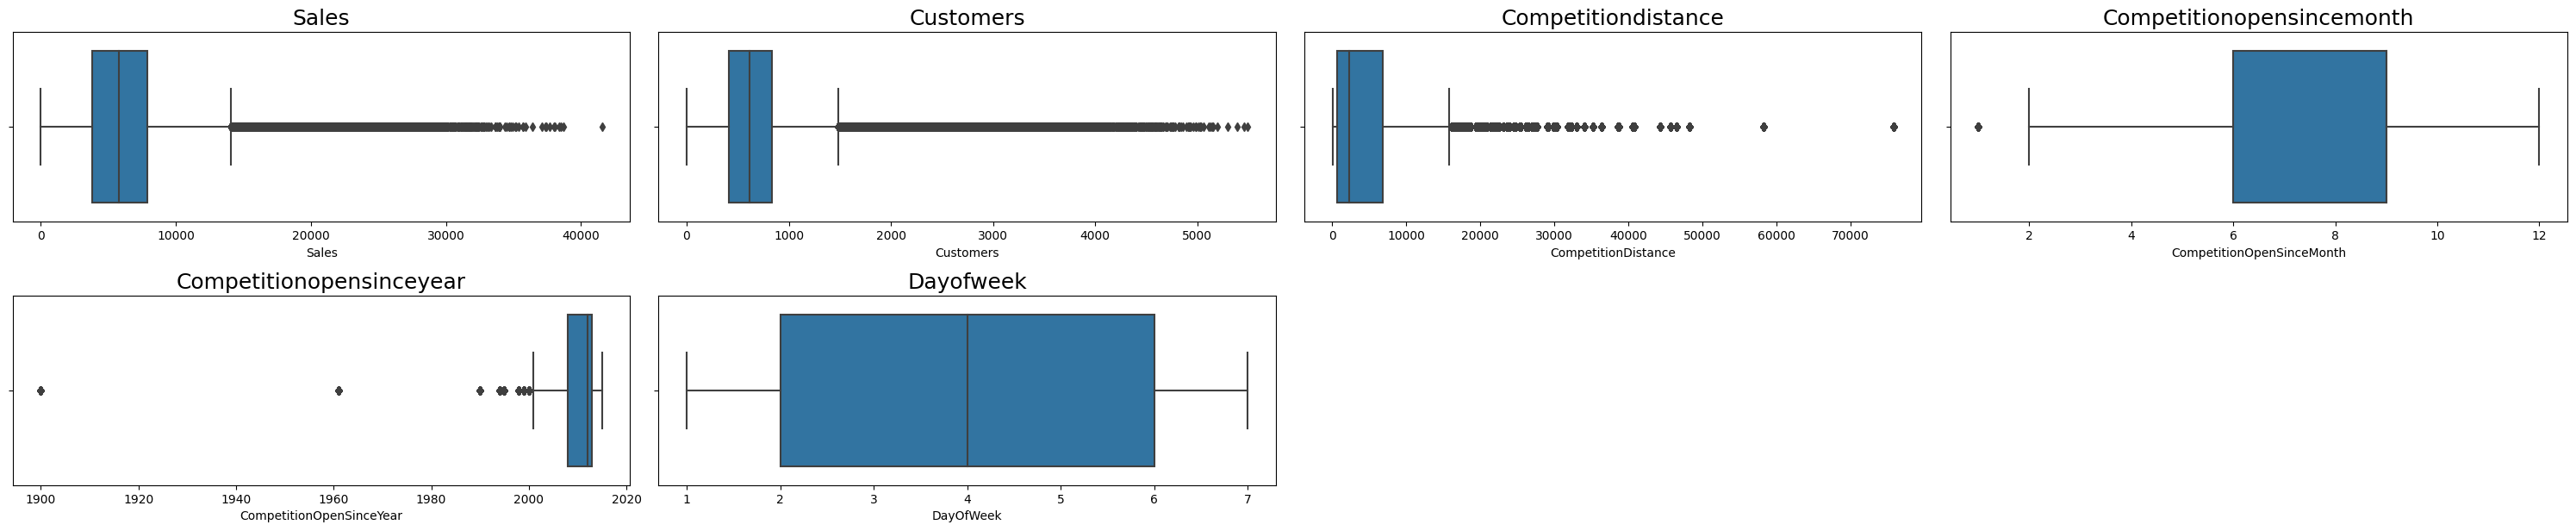

In [68]:
# Check the outlier with boxplot
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = df).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

In [69]:
# IQR Technique to treat outliers
def iqr2_treat_outliers(data):
  # now calculating first and last quartile
  q1,q3 = np.percentile(data, [25,75])
  # now calculating interquartile range
  IQR = q3-q1
  # now the bounds
  Lower_bound = q1-(1.5*IQR)
  Upper_bound = q3+(1.5*IQR)
  # now the outliers
  Outliers = [x for x in data if x<Lower_bound or x>Upper_bound]
  # replacement with the nearest quartile
  data_treatment = [q1 if x<Lower_bound
                    else q3 if x>Upper_bound
                    else x for x in data]
  int_treateddata = [int (absolute) for absolute in data_treatment]

  return int_treateddata

In [70]:
for column in continuous_value_column:
  df[column] = iqr2_treat_outliers(df[column])

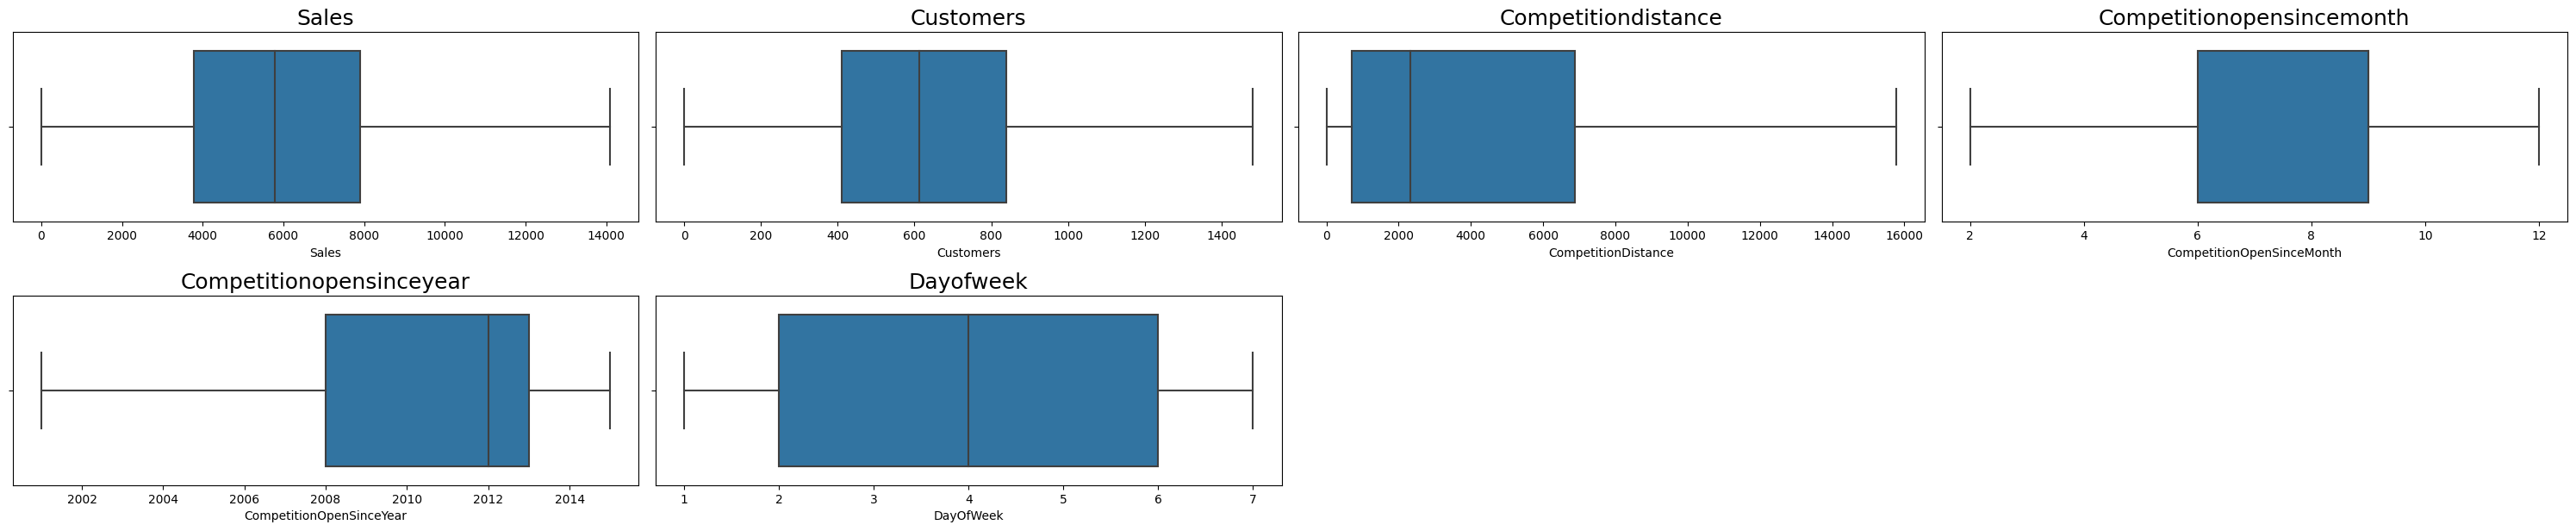

In [71]:
# Now rechecking outliers by plotting box plot
plt.figure(figsize = (30,15))
for n, column in enumerate(continuous_value_column):
  plt.subplot(5,4,n+1)
  sns.boxplot(x =column, data = df).set_title(f'{column.title()}', fontsize = 18)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We used IQR Techniques to treat the outliers Because IQR is used to measure variability by dividing a data set into quartiles. The data is sorted in ascending order and split into 4 equal parts.

### 3. Categorical Encoding

In [72]:
# Encode your categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868510 entries, 0 to 868509
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      868510 non-null  int64  
 1   DayOfWeek                  868510 non-null  int64  
 2   Sales                      868510 non-null  int64  
 3   Customers                  868510 non-null  int64  
 4   Open                       868509 non-null  float64
 5   Promo                      868509 non-null  float64
 6   StateHoliday               868509 non-null  object 
 7   SchoolHoliday              868509 non-null  float64
 8   StoreType                  868510 non-null  object 
 9   Assortment                 868510 non-null  object 
 10  CompetitionDistance        868510 non-null  int64  
 11  CompetitionOpenSinceMonth  868510 non-null  int64  
 12  CompetitionOpenSinceYear   868510 non-null  int64  
 13  Promo2                     86

In [73]:
# Change value string  to integer
df['StoreType'] = np.where(df['StoreType'] == 'a',0,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'b',1,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'c',2,df['StoreType'])
df['StoreType'] = np.where(df['StoreType'] == 'd',3,df['StoreType'])

In [74]:
# Check unique values
df['StoreType'].unique()

array([2, 0, 3, 1], dtype=object)

In [75]:
# Change value string  to integer
df['Assortment'] = np.where(df['Assortment'] == 'a',0,df['Assortment'])
df['Assortment'] = np.where(df['Assortment'] == 'b',1,df['Assortment'])
df['Assortment'] = np.where(df['Assortment'] == 'c',2,df['Assortment'])

In [76]:
df['Assortment'].unique ()

array([0, 2, 1], dtype=object)

In [77]:
# Replace the string values in the `StateHoliday` column with numerical values
df.loc[df['StateHoliday'] == '0' , 'StateHoliday']=0
df['StateHoliday'].value_counts()

0    843342
a     16607
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [78]:
# one Hot Coding
df = pd.get_dummies(df,columns=['StateHoliday'],drop_first= True)

In [79]:
# Change Datatype Object into Integers
df['date'] = df['date'].astype(int)
df['year'] = df['year'].astype(int)
df['StoreType'] = df['StoreType'].astype(int)
df['Assortment'] = df['Assortment'].astype(int)
df['month'] = df['month'].astype(int)

In [91]:
# Re check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868510 entries, 0 to 868509
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      868510 non-null  int64  
 1   DayOfWeek                  868510 non-null  int64  
 2   Sales                      868510 non-null  int64  
 3   Customers                  868510 non-null  int64  
 4   Open                       868509 non-null  float64
 5   Promo                      868509 non-null  float64
 6   SchoolHoliday              868509 non-null  float64
 7   StoreType                  868510 non-null  int64  
 8   Assortment                 868510 non-null  int64  
 9   CompetitionDistance        868510 non-null  int64  
 10  CompetitionOpenSinceMonth  868510 non-null  int64  
 11  CompetitionOpenSinceYear   868510 non-null  int64  
 12  Promo2                     868510 non-null  int64  
 13  year                       86

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Using Numpy Function we Changed String Values to Categorical Values (Store and Assortment) and Using Dummification Techniques in (Stateholiday) Column .

* And using Astype function Convert Object to Integer.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [92]:
# Manipulate Features to minimize feature correlation and create new features
numerical_values = list(df.describe().columns)
numerical_values

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

SystemError: ignored

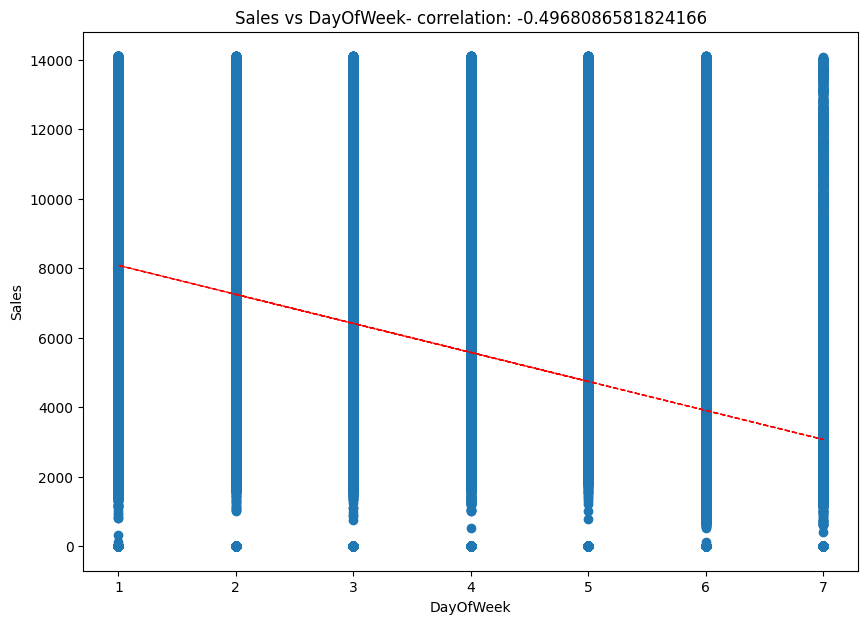

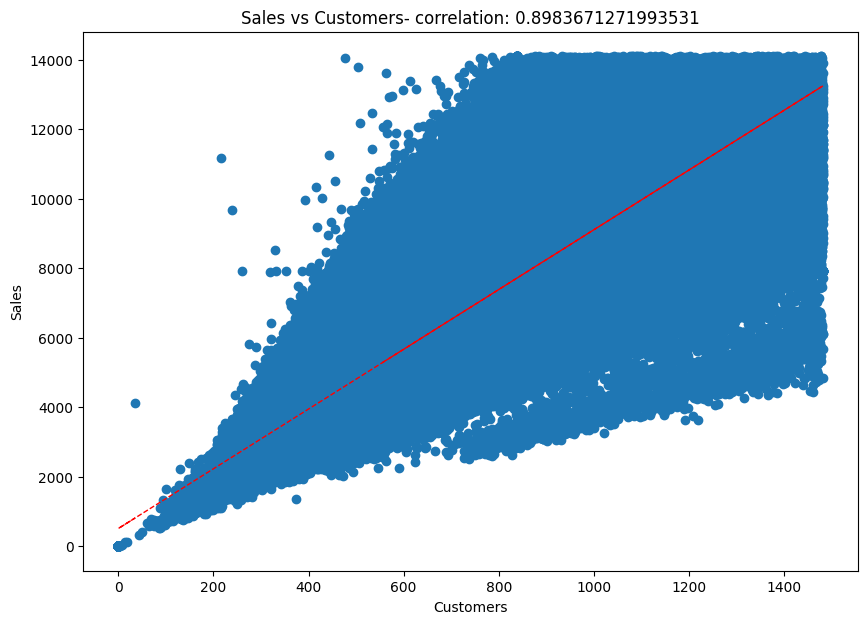

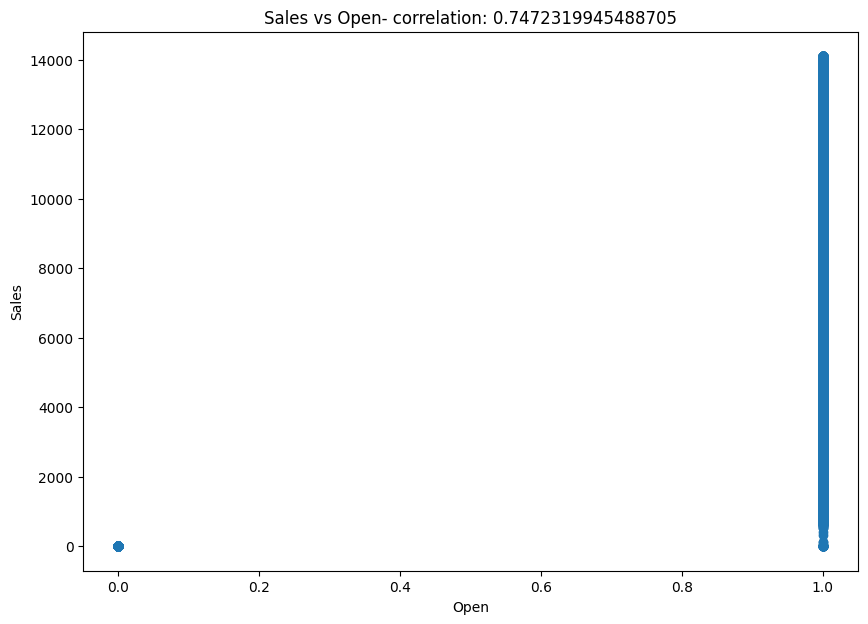

In [144]:
# Check correlation Depa
for col in numerical_values:
  if col not in ['Sales', 'Store']:
   fig = plt.figure(figsize = (10,7))
   ax = fig.gca()
   feature = df[col]
   label = df['Sales']
   Correlation = feature.corr(label)
   plt.scatter (x= feature , y = label)
   plt.xlabel(col)
   plt.ylabel('Sales')
   ax.set_title('Sales vs ' + col + '- correlation: ' + str(Correlation))
   z = np.polyfit(df[col], df['Sales'], 1)
   y_hat = np.poly1d(z)(df[col])

   plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#### 2. Feature Selection

In [94]:
# Select your features wisely to avoid overfitting

<function matplotlib.pyplot.show(close=None, block=None)>

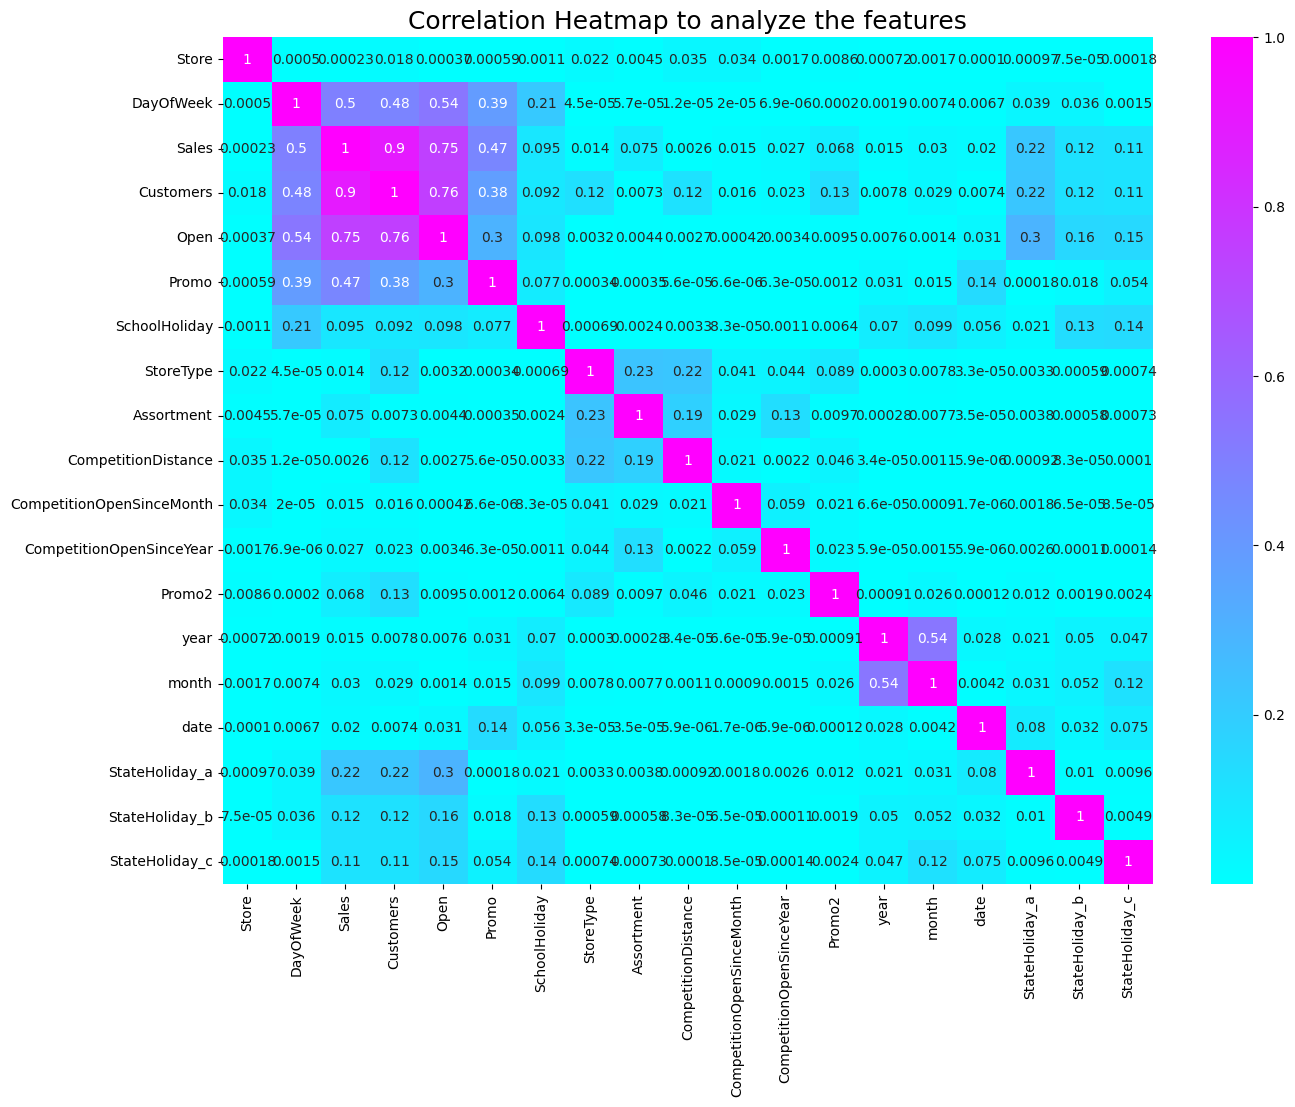

In [95]:
plt.figure(figsize = (15,11))
sns.heatmap(abs(df.corr()), annot = True, cmap = 'cool').set_title('Correlation Heatmap to analyze the features', fontsize = 18)
plt.show


In [152]:
# Using Variance inflation factor.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variable"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values ,i) for i in range (X.shape[1])]

  return(vif)

In [153]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Calculate VIF for cleaned DataFrame
vif_result = calc_vif(df_cleaned[[col for col in df_cleaned.describe().columns if col != 'Sales']])

# Display the results
print(vif_result)


                     variable            VIF
0                       Store       4.022302
1                   DayOfWeek       8.632176
2                   Customers      10.660811
3                        Open      17.980134
4                       Promo       2.093754
5               SchoolHoliday       1.359172
6                   StoreType       2.022141
7                  Assortment       2.079844
8         CompetitionDistance       2.246992
9   CompetitionOpenSinceMonth       9.638093
10   CompetitionOpenSinceYear  318902.955028
11                     Promo2       2.098292
12                       year  318319.747151
13                      month       4.986267
14                       date       4.439346
15             StateHoliday_a       1.221890
16             StateHoliday_b       1.093682
17             StateHoliday_c       1.090561


##### What all feature selection methods have you used  and why?

Variance Inflation Factor (VIF): VIF measures how much the variance of a feature is inflated by the variance of other features in the model. A VIF of greater than 5 indicates that the feature is highly correlated with other features in the model.Variance Inflation Factor Method used because VIF measures the strength of the correlation between the independent variables in regression analysis.


##### Which all features you found important and why?

I found the following features to be important:

Open        
CompetitionOpenSinceYear         
Year       
These features are important because they are all related to the sales of the store.                       
 The Open feature indicates whether the store is open on a given day.

 The CompetitionOpenSinceYear feature indicates how long the nearest competitor has been open.                                                                
 The year feature indicates the year in which the sale occurred.

Which columns highly correlated with each variables those column we remove it.

StoreType
Assortment
Competition
Promo2
PromoInterval
These features are highly correlated with other features in the model, and removing them may improve the performance of the model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

In [156]:
# Drop some columns
indendent_var =df.columns.drop(['Sales', 'Open','CompetitionOpenSinceYear','year'])

In [157]:
indendent_var

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2', 'month', 'date',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [158]:
dependent_var = df['Sales']

In [159]:
# Giving the feature name
X = df[indendent_var]
y  = df[['Sales']]

### 6. Data Scaling

In [160]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

In [161]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
Ans.
We have used standard scaler method to scale our data. Standardizzing the data is important because features on different scale can lead to poor performance or slow convergence. Scaling the datas leads to compare the different features with the target variable by comparing the magnitude of its coefficient.

### 7. Data Splitting

In [162]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [164]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((694808, 15), (173702, 15), (694808, 1), (173702, 1))

##### What data splitting ratio have you used and why?

We have spilting Data set 80% to train set and 20 % to test set. We splitted the dataset into this ratio because our dataset is huge and contains nearly 10 lakh observations.

## ***7. ML Model Implementation***

In [165]:

X_train_with_coumns = X_train

In [166]:
# Importation of required libraries to measure the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [182]:
# Visualizing evaluation Metric Score chart
from sklearn import metrics
def regression_metric (true, predicted):
  Mae = metrics.mean_absolute_error(true, predicted) # Mean absolute error
  Mse = metrics.mean_squared_error(true, predicted) # Mean Squared error
  Rmse = np.sqrt(metrics.mean_squared_error(true, predicted)) # Root mean squre error
  r2_square = metrics.r2_score(true, predicted) # R2 squre
  Mape = mean_absolute_percentage_error(true,predicted)*100 # Mean absolute error
  Accuracy = 100 - Mape
  print('MAE:', Mae)
  print('MSE:', Mse)
  print('RMSE:', Rmse)
  print('MAPE',Mape)
  print('R2 Square', r2_square)
  print('Accuracy ', Accuracy ,'%')

### ML Model - 1

Linear Regressions (algorithm)

In [ ]:
# Creation of Ridge Instance
ridge= Ridge()

# Parameters
parameters = {'alpha': [17], 'max_iter':[2]}

# Train the model
ridge_reg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [17], 'max_iter': [2]},
             scoring='neg_mean_squared_error')

In [ ]:
Y_train_ridge_pred = ridge_reg.predict(X_train)
Y_test_ridge_pred = ridge_reg.predict(X_test)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)
print("\nUsing ",ridge_reg.best_params_, " the negative mean squared error is: ", ridge_reg.best_score_)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}

Using  {'alpha': 17, 'max_iter': 2}  the negative mean squared error is:  -1653050.6536696989


In [ ]:
e_net= ElasticNet()
elasticnet = ElasticNet(alpha = 0.1 , l1_ratio = 0.5)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [ ]:
Y_test_pred = elasticnet.predict(X_test)
Y_train_pred = elasticnet.predict(X_train)

In [ ]:
print('Train set\n_________________')
regression_metric(Y_pred_train, y_train)
print('Test set \n_________________')
regression_metric(Y_pred_test , y_test)

Train set
_________________
MAE: 895.1654857295399
MSE: 1652936.0703503413
RMSE: 1285.6656137387906
MAPE 29.30921017184989
R2 Square 0.8268928978365112
Accuracy  70.69078982815012 %
Test set 
_________________
MAE: 892.7948540444015
MSE: 1644860.6766456033
RMSE: 1282.5212187896166
MAPE 29.196166093189273
R2 Square 0.8271154020674981
Accuracy  70.80383390681072 %


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as hyperparameter optimization technique. Because it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No Haven't Seen any kind of improvement while using rigde , lasso and elastic net model

### ML Model - 2

Decision Tree (algorithm)

In [ ]:
# Import Decision tree sklearn library
from sklearn.tree import DecisionTreeRegressor
# Ml model Implementation
decision_tree=DecisionTreeRegressor(max_depth=15)
# fit model
decision_tree.fit(X_train , y_train)


DecisionTreeRegressor(max_depth=15)

In [ ]:
# predict model
Y_pred_test_dt = decision_tree.predict(X_test)
Y_pred_train_dt = decision_tree.predict(X_train)

In [ ]:
#  Check evaluation matric score
print('Train set\n_________________')
regression_metric(Y_pred_train_dt, y_train)

print('Test set \n_________________')
regression_metric(Y_pred_test_dt , y_test)

Train set
_________________
MAE: 449.4948901830161
MSE: 549597.7953868443
RMSE: 741.3486328218622
MAPE 6.530318150907183
R2 Square 0.9484041201068293
Accuracy  93.46968184909282 %
Test set 
_________________
MAE: 482.4166365529634
MSE: 622003.4257306292
RMSE: 788.6719379631998
MAPE 7.045976570558267
R2 Square 0.9413366197961851
Accuracy  92.95402342944173 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (GridSearch CV)
from sklearn.model_selection import GridSearchCV

In [ ]:
decision_tree= DecisionTreeRegressor()
# parameter
parameter = {'max_depth': [18], 'min_samples_leaf': [5], 'min_samples_split': [3]}
dt_reg = GridSearchCV(decision_tree , parameter,scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
dt_reg.fit(X_train,y_train)



GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [18], 'min_samples_leaf': [5],
                         'min_samples_split': [3]},
             scoring='neg_mean_squared_error')

In [ ]:
# Predict on the model
Y_train_dt_grid = dt_reg.predict(X_train)
Y_test_dt_grid =  dt_reg.predict (X_test)

In [ ]:
# Check evaluation matric score

print('Train set\n_________________')
regression_metric(Y_train_dt_grid, y_train)
print('Test set \n_________________')
regression_metric(Y_test_dt_grid, y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

Train set
_________________
MAE: 347.0698373634891
MSE: 371143.64922003605
RMSE: 609.2156015894833
MAPE 5.022000083985881
R2 Square 0.9657313855985658
Accuracy  94.97799991601411 %
Test set 
_________________
MAE: 406.27486162876363
MSE: 496628.03349689196
RMSE: 704.7184072357497
MAPE 5.921899574193424
R2 Square 0.9539190496263595
Accuracy  94.07810042580658 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}


##### Which hyperparameter optimization technique have you used and why?

Here we use GridsearchCV as hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes we have seen improvement in R2 square of test . R2' square increase 0.9413 to 0.9538 and accuracy of model increase 92 % to 94% it's good .

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

We assess our ML model using several metrics in an effort to reduce the errors between real and projected values. All of these indicators aim to show us how near we are to the actual or anticipated output. Each evaluation parameter in our situation indicates a very little difference between the train and test data, indicating that our model is projecting a predicted value that is fairly near to the actual value. Therefore, the dependent variable, sales, which has an influence on the business, is correctly predicted to the extent of 94% and 6% away from the mean of actual absolute values.

### ML Model - 3

### Random forest Algorithm

In [ ]:
# import sklearn library
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# ML Model - 3 Implementation
rand_for = RandomForestRegressor (n_estimators=100, max_depth=16)
# Fit the Algorithm
rand_for.fit(X_train, y_train)

<ipython-input-231-dccdd0b09c9b>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_for.fit(X_train, y_train)


RandomForestRegressor(max_depth=16)

In [ ]:
train_rand_for_pre = rand_for.predict(X_train)
test_rand_for_pre = rand_for.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train set\n_________________')
regression_metric(train_rand_for_pre, y_train)
print('Test set \n_________________')
regression_metric(test_rand_for_pre, y_test)

Train set
_________________
MAE: 365.7481142430775
MSE: 371004.7416650144
RMSE: 609.1015856694304
MAPE 5.282178912542428
R2 Square 0.9649936054032636
Accuracy  94.71782108745757 %
Test set 
_________________
MAE: 402.1059232444304
MSE: 449421.3201811523
RMSE: 670.3889320246511
MAPE 5.829674285536654
R2 Square 0.9573400126994186
Accuracy  94.17032571446335 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (GridSearch CV.)
rand_f = RandomForestRegressor()
parameters= {'n_estimators':[100], 'max_depth': [20], 'min_samples_leaf': [3]}
rand_f = GridSearchCV(rand_f, parameters, n_jobs= 1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
# Fit the Algorithm
rand_f.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-357605.088 total time= 3.4min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-365926.563 total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END max_depth=20, min_samples_leaf=3, n_estimators=100;, score=-369920.827 total time= 3.6min


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [20], 'min_samples_leaf': [3],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Predict on the model
train_rand_f_pred = rand_f.predict(X_train)
test_rand_f_pred = rand_f.predict(X_test)

In [ ]:
# Check evaluation matric score
print('Train set\n_________________')
regression_metric(train_rand_f_pred, y_train)
print('Test set \n_________________')
regression_metric(test_rand_f_pred, y_test)
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

Train set
_________________
MAE: 256.2528984203533
MSE: 211741.7876411989
RMSE: 460.1540911925036
MAPE 3.705543906291449
R2 Square 0.9803886727841806
Accuracy  96.29445609370855 %
Test set 
_________________
MAE: 331.27275753901665
MSE: 345648.87393350434
RMSE: 587.9191049230365
MAPE 4.82257161976684
R2 Square 0.9677229251795085
Accuracy  95.17742838023317 %
The best fit alpha value is found out to be : {'alpha': 17, 'max_iter': 2}


##### Which hyperparameter optimization technique have you used and why?

Here we use GridsearchCV as hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. After this it calculates the performance for each combinations and picked the best value for the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we have seen improvement to using gridsearchCv hypermeter optimization technique lots of increment of model of r2 square metric test 94 to 96 it's quite good model because  we avoid overfiting model and accuracy increment from  94 to 95 it's to good .

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
reg_metrics = ['Linear_regression', 'Decision_tree','Random_forest']
MAE_reg = [892.79,406.25 , 331.48]
MSE_reg = [1644860,496526,212666]
RMSE_reg = [1282.52,704.64,461.15]
MAPE_reg = [29.19,5.92, 4.82]
r2_reg = [0.82,0.95,0.96]
accuracy_reg = [70,94,95]

data ={'Model':reg_metrics,
       'MAE':MAE_reg,
       'MSE':MSE_reg,
       'RMSE':RMSE_reg,
       'MAPE':MAPE_reg,
       'R2':r2_reg ,
       'Accuracy':accuracy_reg}
Metric_score = pd.DataFrame(data)

In [ ]:
Metric_score

,Model,MAE,MSE,RMSE,MAPE,R2,Accuracy
0,Linear_regression,892.79,1644860,1282.52,29.19,0.82,70
1,Decision_tree,406.25,496526,704.64,5.92,0.95,94
2,Random_forest,331.48,212666,461.15,4.82,0.96,95


We will select random forest for our final predict because it give us the accurate model (95) accuracy of our model.

### 2. Explain the model which you have used and the feature importance using any model explainability tool?

Text(0.5, 0, 'Relative Importance')

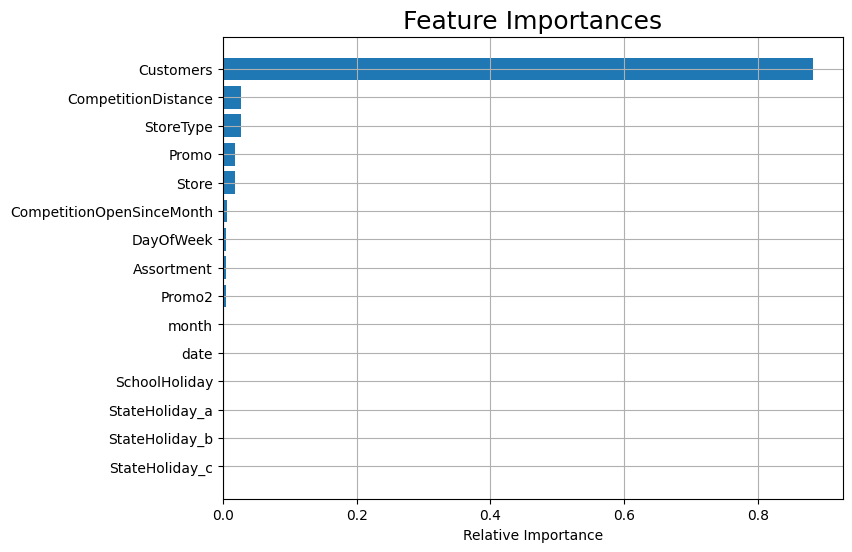

In [ ]:
features = X_train_with_coumns.columns
importances = rand_for.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (8,6))
plt.grid(zorder = 0)
plt.title('Feature Importances', fontsize = 18)
plt.barh(range(len(indices)),  importances[indices],align = 'center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### **EDA Conclusion**

We originally performed EDA on each feature of our datset over the course of our investigation. Sales, our dependent variable, was first analyzed and converted. Next, we examined categorical variables and eliminated those that were dominated by a single class. We also examined numerical variables and used the corr() Function to determine their correlation, distribution, and relationship to the dependent variable. Finally, for multicollinearity, we used the VIF Function that we had developed. Additionally, we hot encoded the categorical variables and deleted several numerical characteristics with a large percentage of 0 values.

* As my observation Sales are highest during three month of the year i.e.,July, November and December and least sales are during the month of May.
* Sales increases year by year because of stores gives discount on productst.
*  When School is closes Some stores sales droping but B type of store no effect on sales when school open or close.
*  Mostly Sales of B type of Assortment (Extra things).
* Sales are maximum during the Public Holidays, where are during the religious occassions, like Easter or Christmas, the sales are lower , most of sales of B type assortment of all Holiday.
*  As my ovservation the highest sales belonged to the store type A due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

# Conclusion Ml Models

We Used three types of Machin learning algorithm for best prediction Linear Regressions, Decision Tree and Hyperparmeter techniques.

 First we start with Linear Regression we have approx 70% accuracy  and R2 0.82 on test data but this is not upto the mark. So for more accuracy we moved further with more complex model i.e., Decision Tree.

 On test data, this model has an almost 94%  accuracy rate or R2 0.95 , which is better than the linear regression model. But in order to ensure your happiness, we also ran a Random Forest Regressor model.

 We achieved around 95% accuracy or R2 0.96 on test data with our model, which is an improvement over the prior model.

 The best outcome is being produced by the Random Forest Regressor. So, in order to forecast our model, we will utilize Random Forest Regressor.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [136]:
! install Lasso

install: missing destination file operand after 'Lasso'
Try 'install --help' for more information.


In [137]:
! pip install Lasso

In [184]:
! pip install Linear Regressions

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Linear: filename=linear-0.0.dev0-py3-none-any.whl size=1716 sha256=dcf4f95afb994fe9fb02fb233eef5eb087988599cfddae2d46f06e4b90e3a0ca
  Stored in directory: /root/.cache/pip/wheels/2c/5c/34/0c0faa6f0573f97916b5bf51d2ceb7435d36dc99a9ad717cda
  Created wheel for Regressions: filename=regressions-2.1.1-py3-none-any.whl size=148187 sha256=d15cb8ee3bdf735e02b3fca46e915e3733dcda9ca02fb9fe4e027e5e40179282
  Stored in directory: /root/.cache/pip/wheels/36/d4/ad/e7e69e9ef665494de0f44fd9c00e9235d121051d51d89fc7ea
Successfully built Linear Regressions
